In [1]:
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualizationtest_param_and_plot('max_features', [2, 3, 4, 5, 6, 7])
import warnings 
warnings.filterwarnings('ignore') #ignore warnings


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression


In [3]:
#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Date related Libraries
from datetime import date
#import holidays
import datetime

LOADING TRAINING DATASET

In [4]:
train = pd.read_csv(r'C:\Users\Lovely Upadhyay\Desktop\Forecasting-Walmart-sales-data-main\Forecasting-Walmart-sales-data-main\train (1).csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
#checking for null values in training dataset
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

LOADING TEST DATASET

In [6]:
test = pd.read_csv(r'C:\Users\Lovely Upadhyay\Desktop\Forecasting-Walmart-sales-data-main\Forecasting-Walmart-sales-data-main\test.csv')
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [7]:
#Checking null values for testing dataset
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

LOADING FEATURES DATASET

In [8]:
features = pd.read_csv(r'C:\Users\Lovely Upadhyay\Desktop\Forecasting-Walmart-sales-data-main\Forecasting-Walmart-sales-data-main\features (1).csv')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [9]:
#checking null values for features dataset
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

LOADING STORES DATASET

In [10]:
stores = pd.read_csv(r'C:\Users\Lovely Upadhyay\Desktop\Forecasting-Walmart-sales-data-main\Forecasting-Walmart-sales-data-main\stores.csv')
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [11]:
#Checking null values for stores dataset
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

CLEANING DATASET

In [12]:
#ONLY FEATURES VARIABLE HAS NULL VALUES

percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,4158,50.769231
MarkDown2,5269,64.334554
MarkDown3,4577,55.885226
MarkDown4,4726,57.704518
MarkDown5,4140,50.549451
CPI,585,7.142857


CPI and Unemployment columns has just 7% of missing data, so filling missing data with the mean or median of the respective column

In [13]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


<AxesSubplot:xlabel='CPI'>

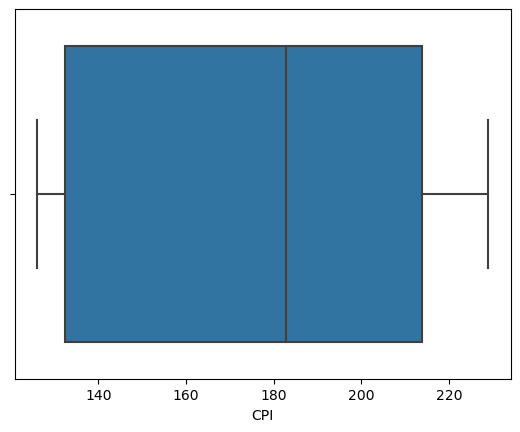

In [14]:
import seaborn as sns
sns.boxplot(x=features['CPI'])

There are no outliers in the CPI column in features variable. So nan values can be replace with mean of that particular column.

In [15]:
features['CPI'].fillna((features['CPI'].mean()), inplace=True)

In [16]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,4158,50.769231
MarkDown2,5269,64.334554
MarkDown3,4577,55.885226
MarkDown4,4726,57.704518
MarkDown5,4140,50.549451
CPI,0,0.000000


All the null values in CPI column are filled with mean value of the CPI column

<AxesSubplot:xlabel='Unemployment'>

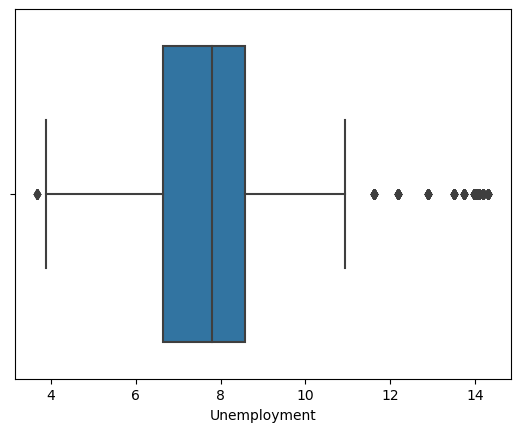

In [17]:
sns.boxplot(x=features['Unemployment'])

As Unemployment column has few outliers and mean will be affected by the outliers, replacing all the null values in Unemployement column with median value

In [18]:
features['Unemployment'].fillna((features['Unemployment'].median()), inplace=True)


In [19]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,4158,50.769231
MarkDown2,5269,64.334554
MarkDown3,4577,55.885226
MarkDown4,4726,57.704518
MarkDown5,4140,50.549451
CPI,0,0.000000


All the null values in Unemployment columns are filled with median value of the Unemployment column

As MarkDowns have missing values more than 50% all nans are replacing with zeros

In [20]:
from statistics import mean

features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)

In [21]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
Store,0,0.0
Date,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
MarkDown1,0,0.0
MarkDown2,0,0.0
MarkDown3,0,0.0
MarkDown4,0,0.0
MarkDown5,0,0.0
CPI,0,0.0


In [22]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Handling negative values in train data


In weekly_Sales column minimum value is the negative values. Sales should always be in zero or in positive rate

In [23]:
train[train.Weekly_Sales<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


In [24]:
#Taking values greater than or equal to zero
train = train[train.Weekly_Sales>=0]
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


EXPLORING TRAIN DATA (EDTA)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.4+ MB


In [26]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [27]:
train['Date'] = pd.to_datetime(train.Date)

In [28]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [29]:
#Converting 'IsHoliday' column values False to 0 and True to 1
train["IsHoliday"] = train["IsHoliday"].astype(int)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


In [30]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int32
dtype: object

#Exracting the time based feature from Date feature as we are predicting the sales

In [31]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week
train['Day']=train['Date'].dt.day
train['n_days']=(train['Date'].dt.date-train['Date'].dt.date.min()).apply(lambda x:x.days)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day,n_days
0,1,1,2010-02-05,24924.50,0,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,1,2010,2,6,12,7
2,1,1,2010-02-19,41595.55,0,2010,2,7,19,14
3,1,1,2010-02-26,19403.54,0,2010,2,8,26,21
4,1,1,2010-03-05,21827.90,0,2010,3,9,5,28


In [32]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day,n_days
421565,45,98,2012-09-28,508.37,0,2012,9,39,28,966
421566,45,98,2012-10-05,628.10,0,2012,10,40,5,973
421567,45,98,2012-10-12,1061.02,0,2012,10,41,12,980
421568,45,98,2012-10-19,760.01,0,2012,10,42,19,987
421569,45,98,2012-10-26,1076.80,0,2012,10,43,26,994


In [33]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [34]:
test['Date'] = pd.to_datetime(test.Date)
test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Week']=test['Date'].dt.week
test['Day']=test['Date'].dt.day
test['n_days']=(test['Date'].dt.date-test['Date'].dt.date.min()).apply(lambda x:x.days)
test.head()

,Store,Dept,Date,IsHoliday,Year,Month,Week,Day,n_days
0,1,1,2012-11-02,False,2012,11,44,2,0
1,1,1,2012-11-09,False,2012,11,45,9,7
2,1,1,2012-11-16,False,2012,11,46,16,14
3,1,1,2012-11-23,True,2012,11,47,23,21
4,1,1,2012-11-30,False,2012,11,48,30,28


Train data has the information of sales for 994 days

In [35]:
#Impact of holidays on sales
print("Holiday")
print(train[train['IsHoliday']==True]['Weekly_Sales'].describe())
print("Non-Holiday")
print(train[train['IsHoliday']==False]['Weekly_Sales'].describe())

Holiday
count     29563.000000
mean      17092.566220
std       27249.206776
min           0.000000
25%        2122.830000
50%        7997.860000
75%       21256.915000
max      693099.360000
Name: Weekly_Sales, dtype: float64
Non-Holiday
count    390722.000000
mean      15949.958317
std       22347.258698
min           0.000000
25%        2117.300000
50%        7636.080000
75%       20193.912500
max      406988.630000
Name: Weekly_Sales, dtype: float64


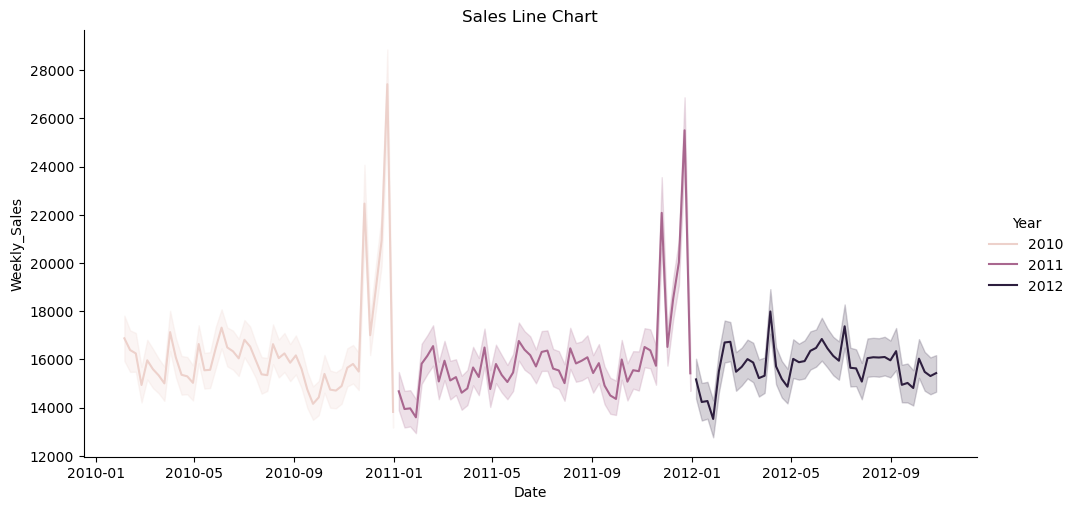

In [36]:
#Sales in holiday week are more than sales in non-holiday week
sns.relplot(x='Date',y='Weekly_Sales',hue='Year',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

1. It can be seen through Line chart that there is no trend in year wise and no random event also happens in any year.

2. Also it can be seen that at the end of the year there is huge sales compared to other month which tells that Christmas and thanksgiving has more impact on sales compared to Super Bowl ,Labour Day.

3. We can create features where we can give separate category for each holiday

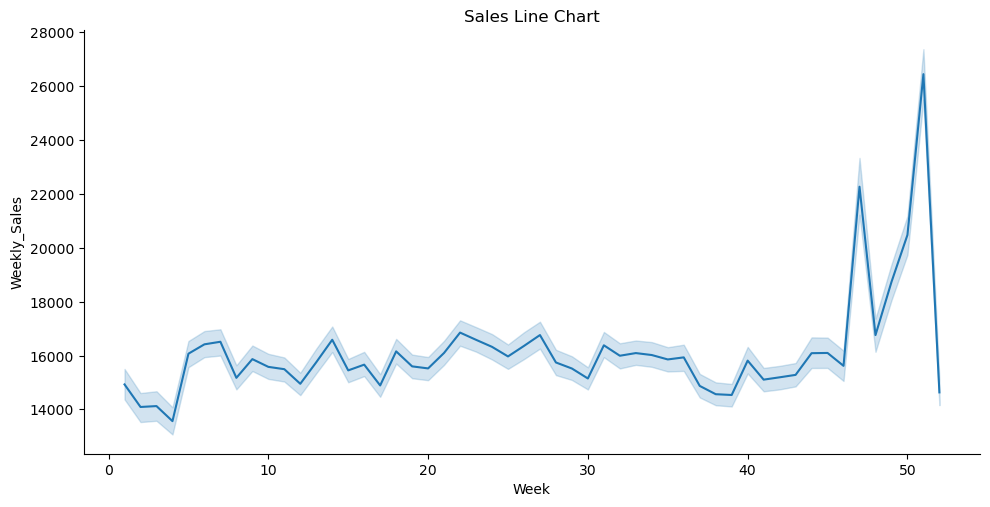

In [37]:
sns.relplot(x='Week',y='Weekly_Sales',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

This could be a useful feature as line is fluctuating for every week. Also week 45 to 50 have higher sales where Christmas and thanksgiving comes

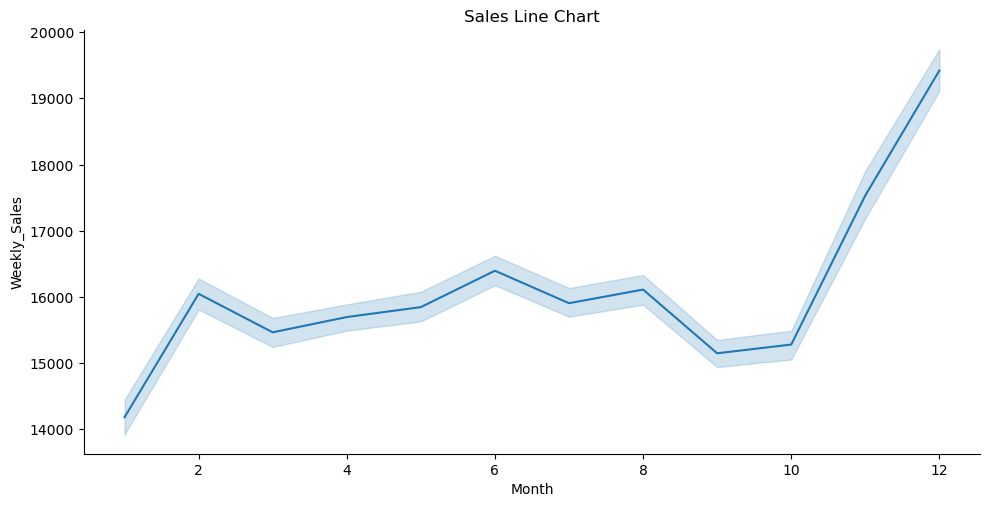

In [38]:
sns.relplot(x='Month',y='Weekly_Sales',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

It can be seen that in november and december sales are very high compared to other month wich tells the impact of thanksgiving and christmas on sales.

EXPLORING FEATURES DATA

In [39]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [40]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [41]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,172.460809,7.825334
std,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,38.292649,1.808971
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653774,6.833000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.460809,7.806000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [42]:
features['Date'] = pd.to_datetime(features.Date)
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [43]:
#Converting 'IsHoliday' column values False to 0 and True to 1
features["IsHoliday"] = features["IsHoliday"].astype(int)
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int32
dtype: object

In [44]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0


EXPLORING STORES DATA

In [45]:
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

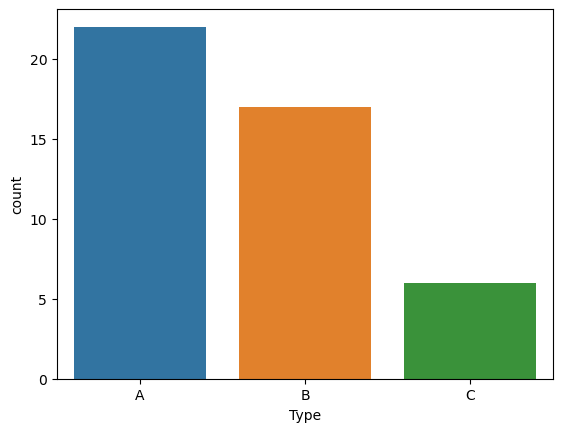

In [46]:
#Type of stores
sns.countplot(x='Type',data=stores)

EXPLORING TEST DATA

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
 4   Year       115064 non-null  int64         
 5   Month      115064 non-null  int64         
 6   Week       115064 non-null  int64         
 7   Day        115064 non-null  int64         
 8   n_days     115064 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(7)
memory usage: 7.1 MB


In [48]:
test.describe()

,Store,Dept,Year,Month,Week,Day,n_days
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,2012.767182,5.729855,23.050963,15.583536,132.610895
std,12.809930,30.656410,0.422629,3.590331,15.750407,8.844900,78.792119
min,1.000000,1.000000,2012.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,18.000000,2013.000000,3.000000,10.000000,8.000000,63.000000
50%,22.000000,37.000000,2013.000000,5.000000,20.000000,15.000000,133.000000
75%,33.000000,74.000000,2013.000000,7.000000,30.000000,23.000000,203.000000
max,45.000000,99.000000,2013.000000,12.000000,52.000000,31.000000,266.000000


In [49]:
test.dtypes

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
Year                  int64
Month                 int64
Week                  int64
Day                   int64
n_days                int64
dtype: object

Mearging train and test data with features and stores data

In [50]:
stores = stores.merge(features,on='Store',how='left')
stores

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0
1,1,A,151315,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1
2,1,A,151315,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0
3,1,A,151315,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0
4,1,A,151315,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.806,0
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.806,0
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.806,0
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.806,0


In [51]:
train  = train.merge(stores,on=['Store','Date','IsHoliday'],how='left')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day,n_days,...,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,2010,2,5,5,0,...,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,2010,2,6,12,7,...,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,2010,2,7,19,14,...,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,2010,2,8,26,21,...,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,2010,3,9,5,28,...,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,98,2012-09-28,508.37,0,2012,9,39,28,966,...,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
420281,45,98,2012-10-05,628.10,0,2012,10,40,5,973,...,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
420282,45,98,2012-10-12,1061.02,0,2012,10,41,12,980,...,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
420283,45,98,2012-10-19,760.01,0,2012,10,42,19,987,...,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  int32         
 5   Year          420285 non-null  int64         
 6   Month         420285 non-null  int64         
 7   Week          420285 non-null  int64         
 8   Day           420285 non-null  int64         
 9   n_days        420285 non-null  int64         
 10  Type          420285 non-null  object        
 11  Size          420285 non-null  int64         
 12  Temperature   420285 non-null  float64       
 13  Fuel_Price    420285 non-null  float64       
 14  MarkDown1     420285 non-null  float64       
 15  MarkDown2     420

In [53]:
test  = test.merge(stores,on=['Store','Date','IsHoliday'],how='left')
test

,Store,Dept,Date,IsHoliday,Year,Month,Week,Day,n_days,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,2012,11,44,2,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,2012,11,45,9,7,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,2012,11,46,16,14,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,2012,11,47,23,21,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,2012,11,48,30,28,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,2013,6,26,28,238,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.806
115060,45,98,2013-07-05,False,2013,7,27,5,245,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.806
115061,45,98,2013-07-12,False,2013,7,28,12,252,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.806
115062,45,98,2013-07-19,False,2013,7,29,19,259,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.806


Type of values in Stores datase

In [54]:
print("The shape of stores data set is: ", stores.shape)
print("The unique value of store is: ", stores['Store'].unique())
print("The unique value of Type is: ", stores['Type'].unique())
# As store size is a numerical real valued feature.

The shape of stores data set is:  (8190, 14)
The unique value of store is:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
The unique value of Type is:  ['A' 'B' 'C']


The ratio of A,B and C type of walmart stores through pie chart

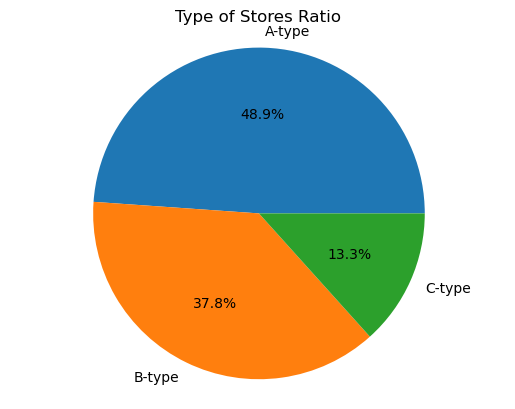

In [55]:
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
i_labels = 'A-type','B-type','C-type'
plt.pie(sizes,labels=i_labels,autopct='%1.1f%%')
plt.title('Type of Stores Ratio')
plt.axis('equal')
plt.show()

Relationship between size and weekly_sales

sales of store for each type of store using box plot

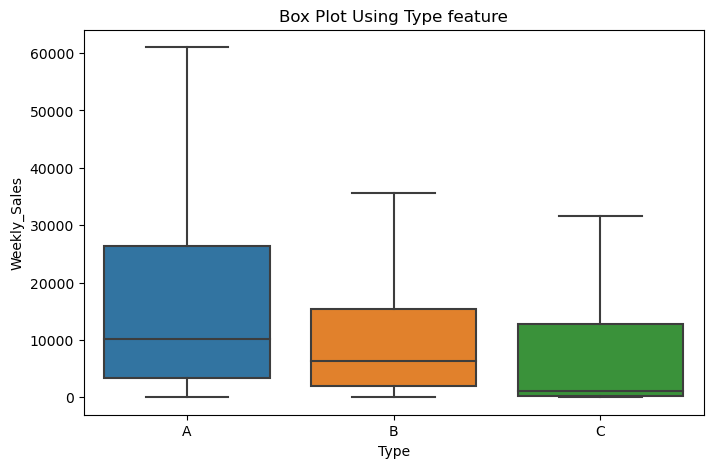

In [57]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Type feature")
plt.show()


1. Through box plot ,we can see that median of each type of store decreases from left to right means from A store to C.

2. So we can conclude that type is an import categorical feature to predict weekly sales. And plays role in increasing sales of a store.

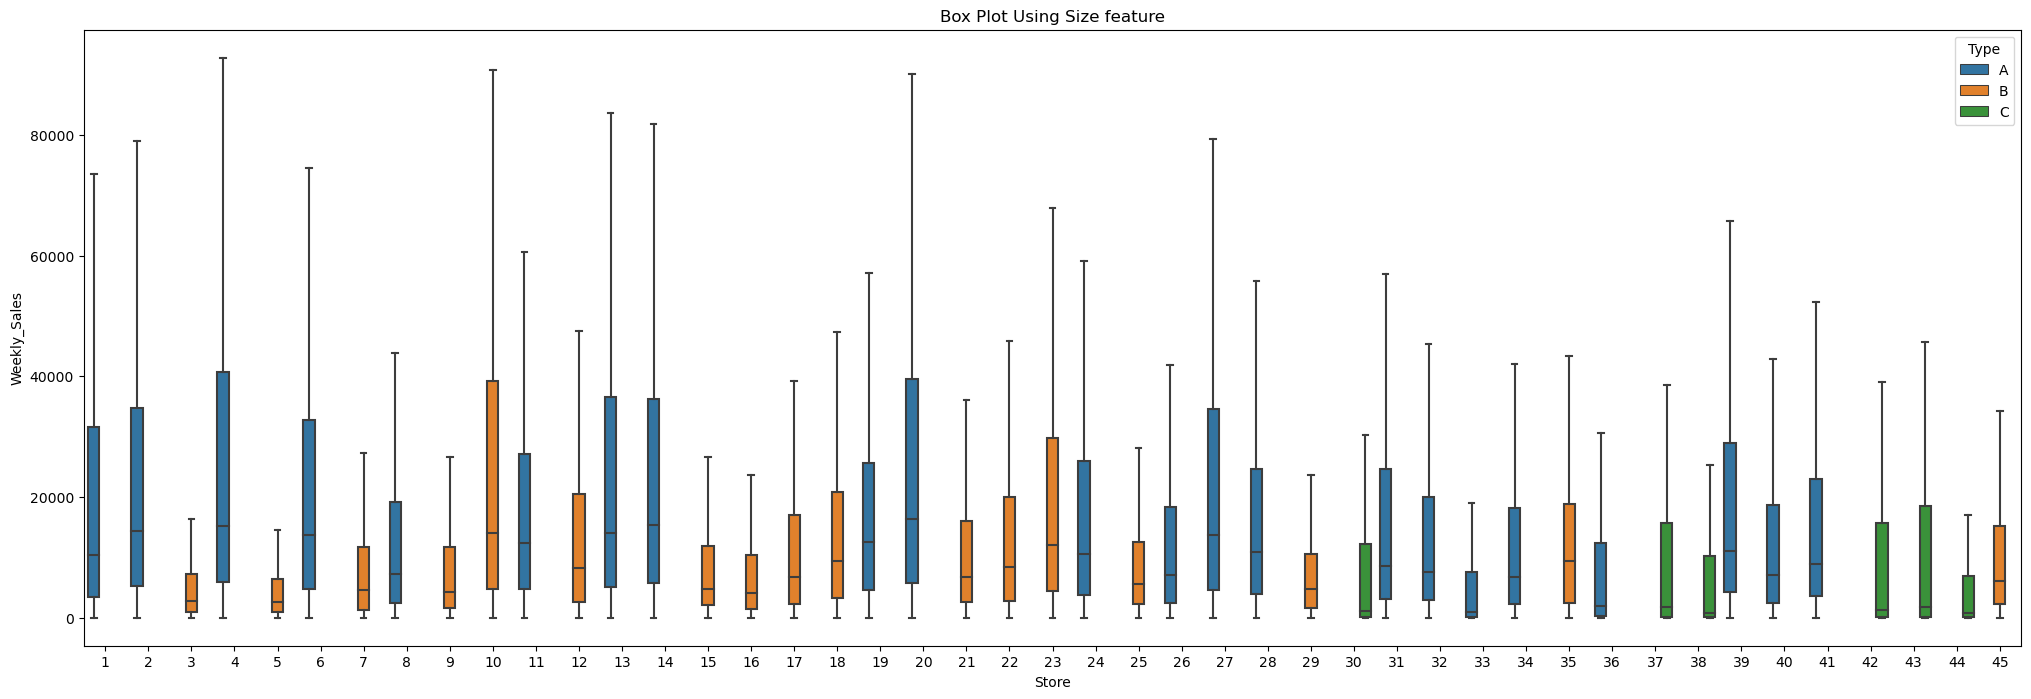

In [59]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data=train,showfliers=False, hue="Type")
plt.title("Box Plot Using Size feature")
plt.show()


Store feature is an useful feature to predict sales. As it comprises of department, size or type and also region as well which was not provided in dataset.

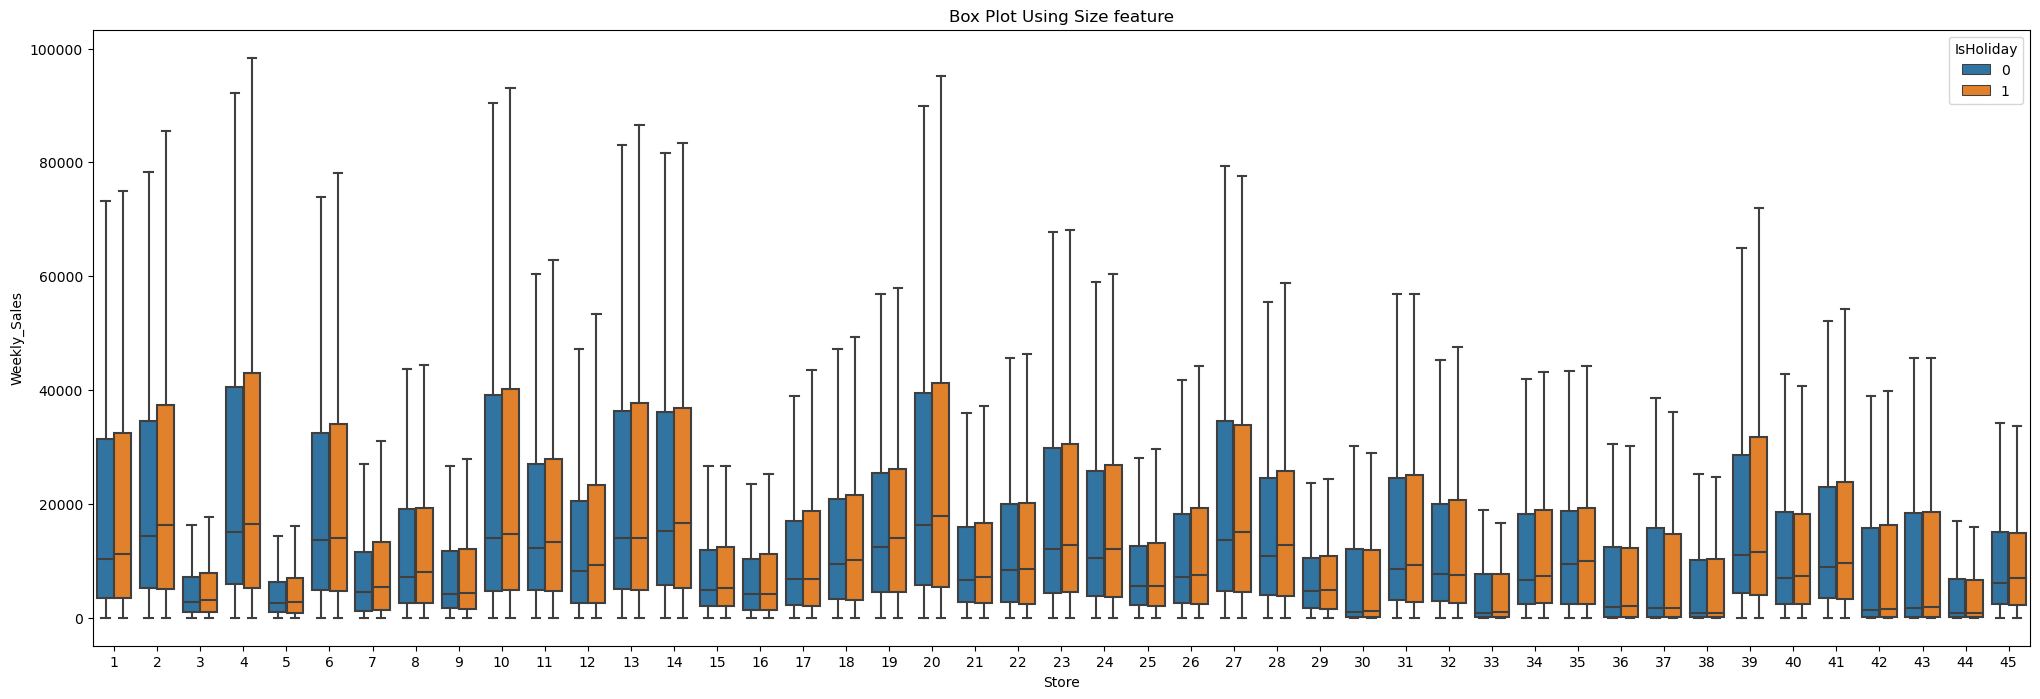

In [60]:
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot Using Size feature")
plt.show()

It can be seen that holidays has some impact on sales of store. for many store, sales have increased.

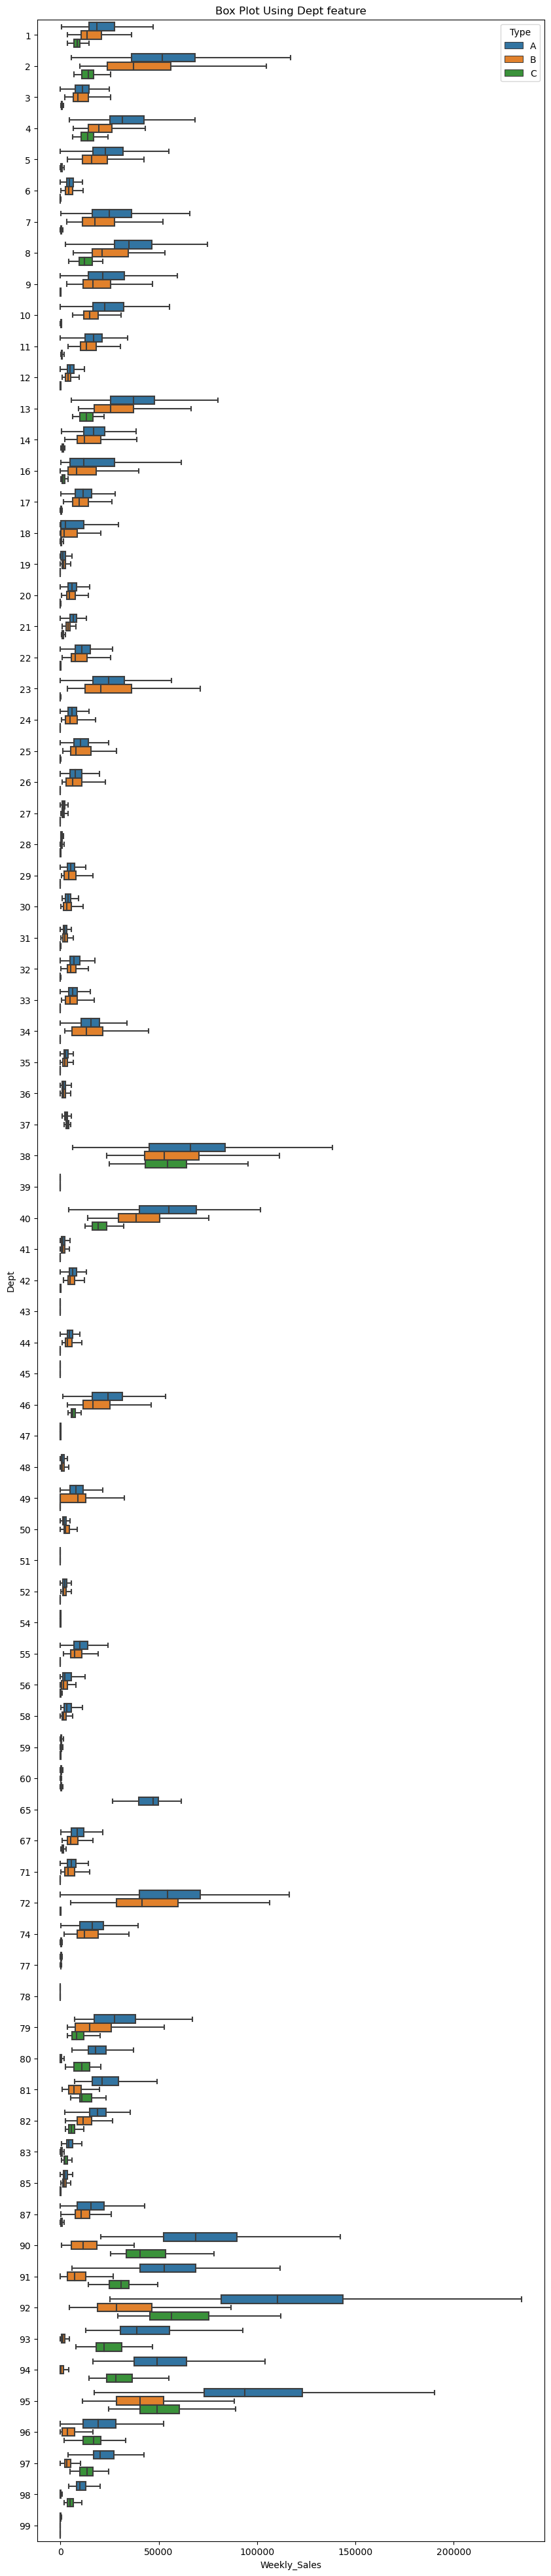

In [61]:
fig, ax = plt.subplots(figsize=(10, 50))
fig = sns.boxplot(y='Dept', x='Weekly_Sales', data=train, showfliers=False, hue="Type",orient="h") 
plt.title("Box Plot Using Dept feature")
plt.show()


1. Department can be a factor in predicting sales as it can be seen through box plot that every department has a different sales than other. Further, department factor is also correlated with type as it can be seen that type A has higher sales in most of the department.

2. Notables are 38,65,72,92 and 95 which have highest average sales

Month wise Weekly Sales visualization

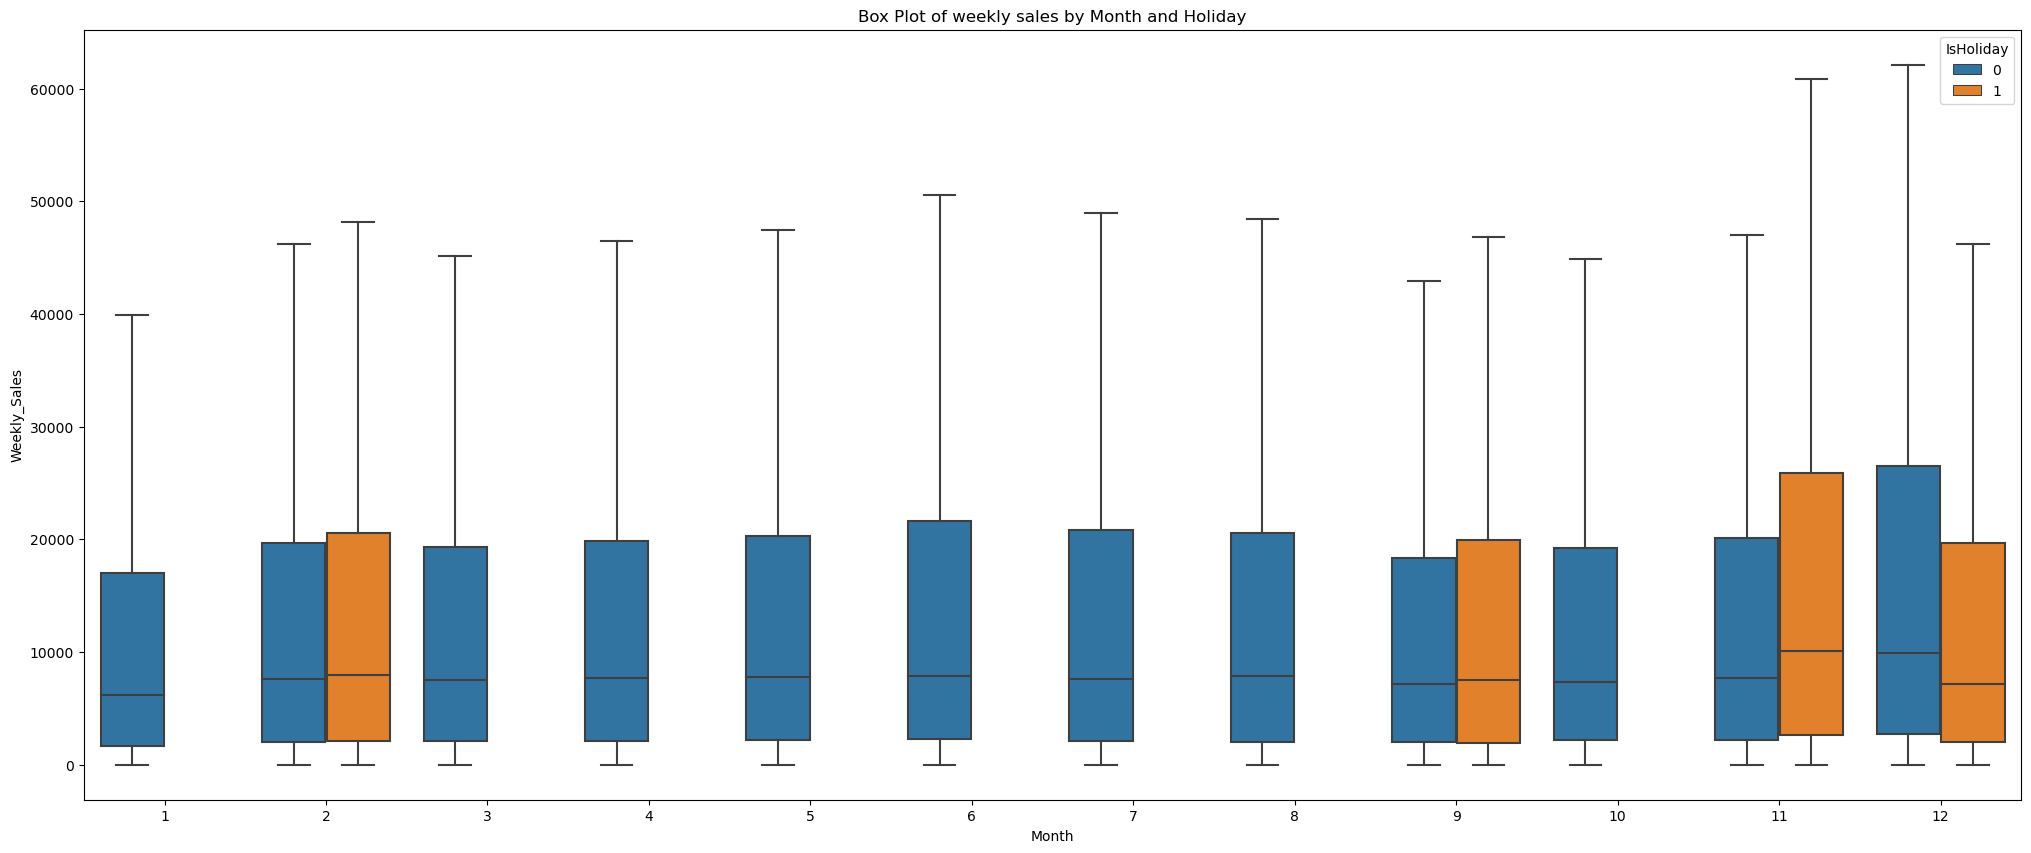

In [64]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Month', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot of weekly sales by Month and Holiday")
plt.show()

In [65]:
train['Is_month_end'] = np.where(train.Day > 22, 1, 0)
train['Is_month_start'] = np.where(train.Day<7,1,0)
train['Is_month_end'] = train['Is_month_end'].astype('bool')
train['Is_month_start'] = train['Is_month_start'].astype('bool')
#This function is creating eta square test
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

In [66]:
print("Correlation of Is_month_end feature with weekly_sales")
print(correlation_ratio(train['Is_month_end'],train['Weekly_Sales']))
print(50*'*')
print("Correlation of Is_month_start feature with weekly_sales")
print(correlation_ratio(train['Is_month_start'],train['Weekly_Sales']))
print(50*'*')

Correlation of Is_month_end feature with weekly_sales
5.216972947042902e-06
**************************************************
Correlation of Is_month_start feature with weekly_sales
1.9811509998094588e-05
**************************************************


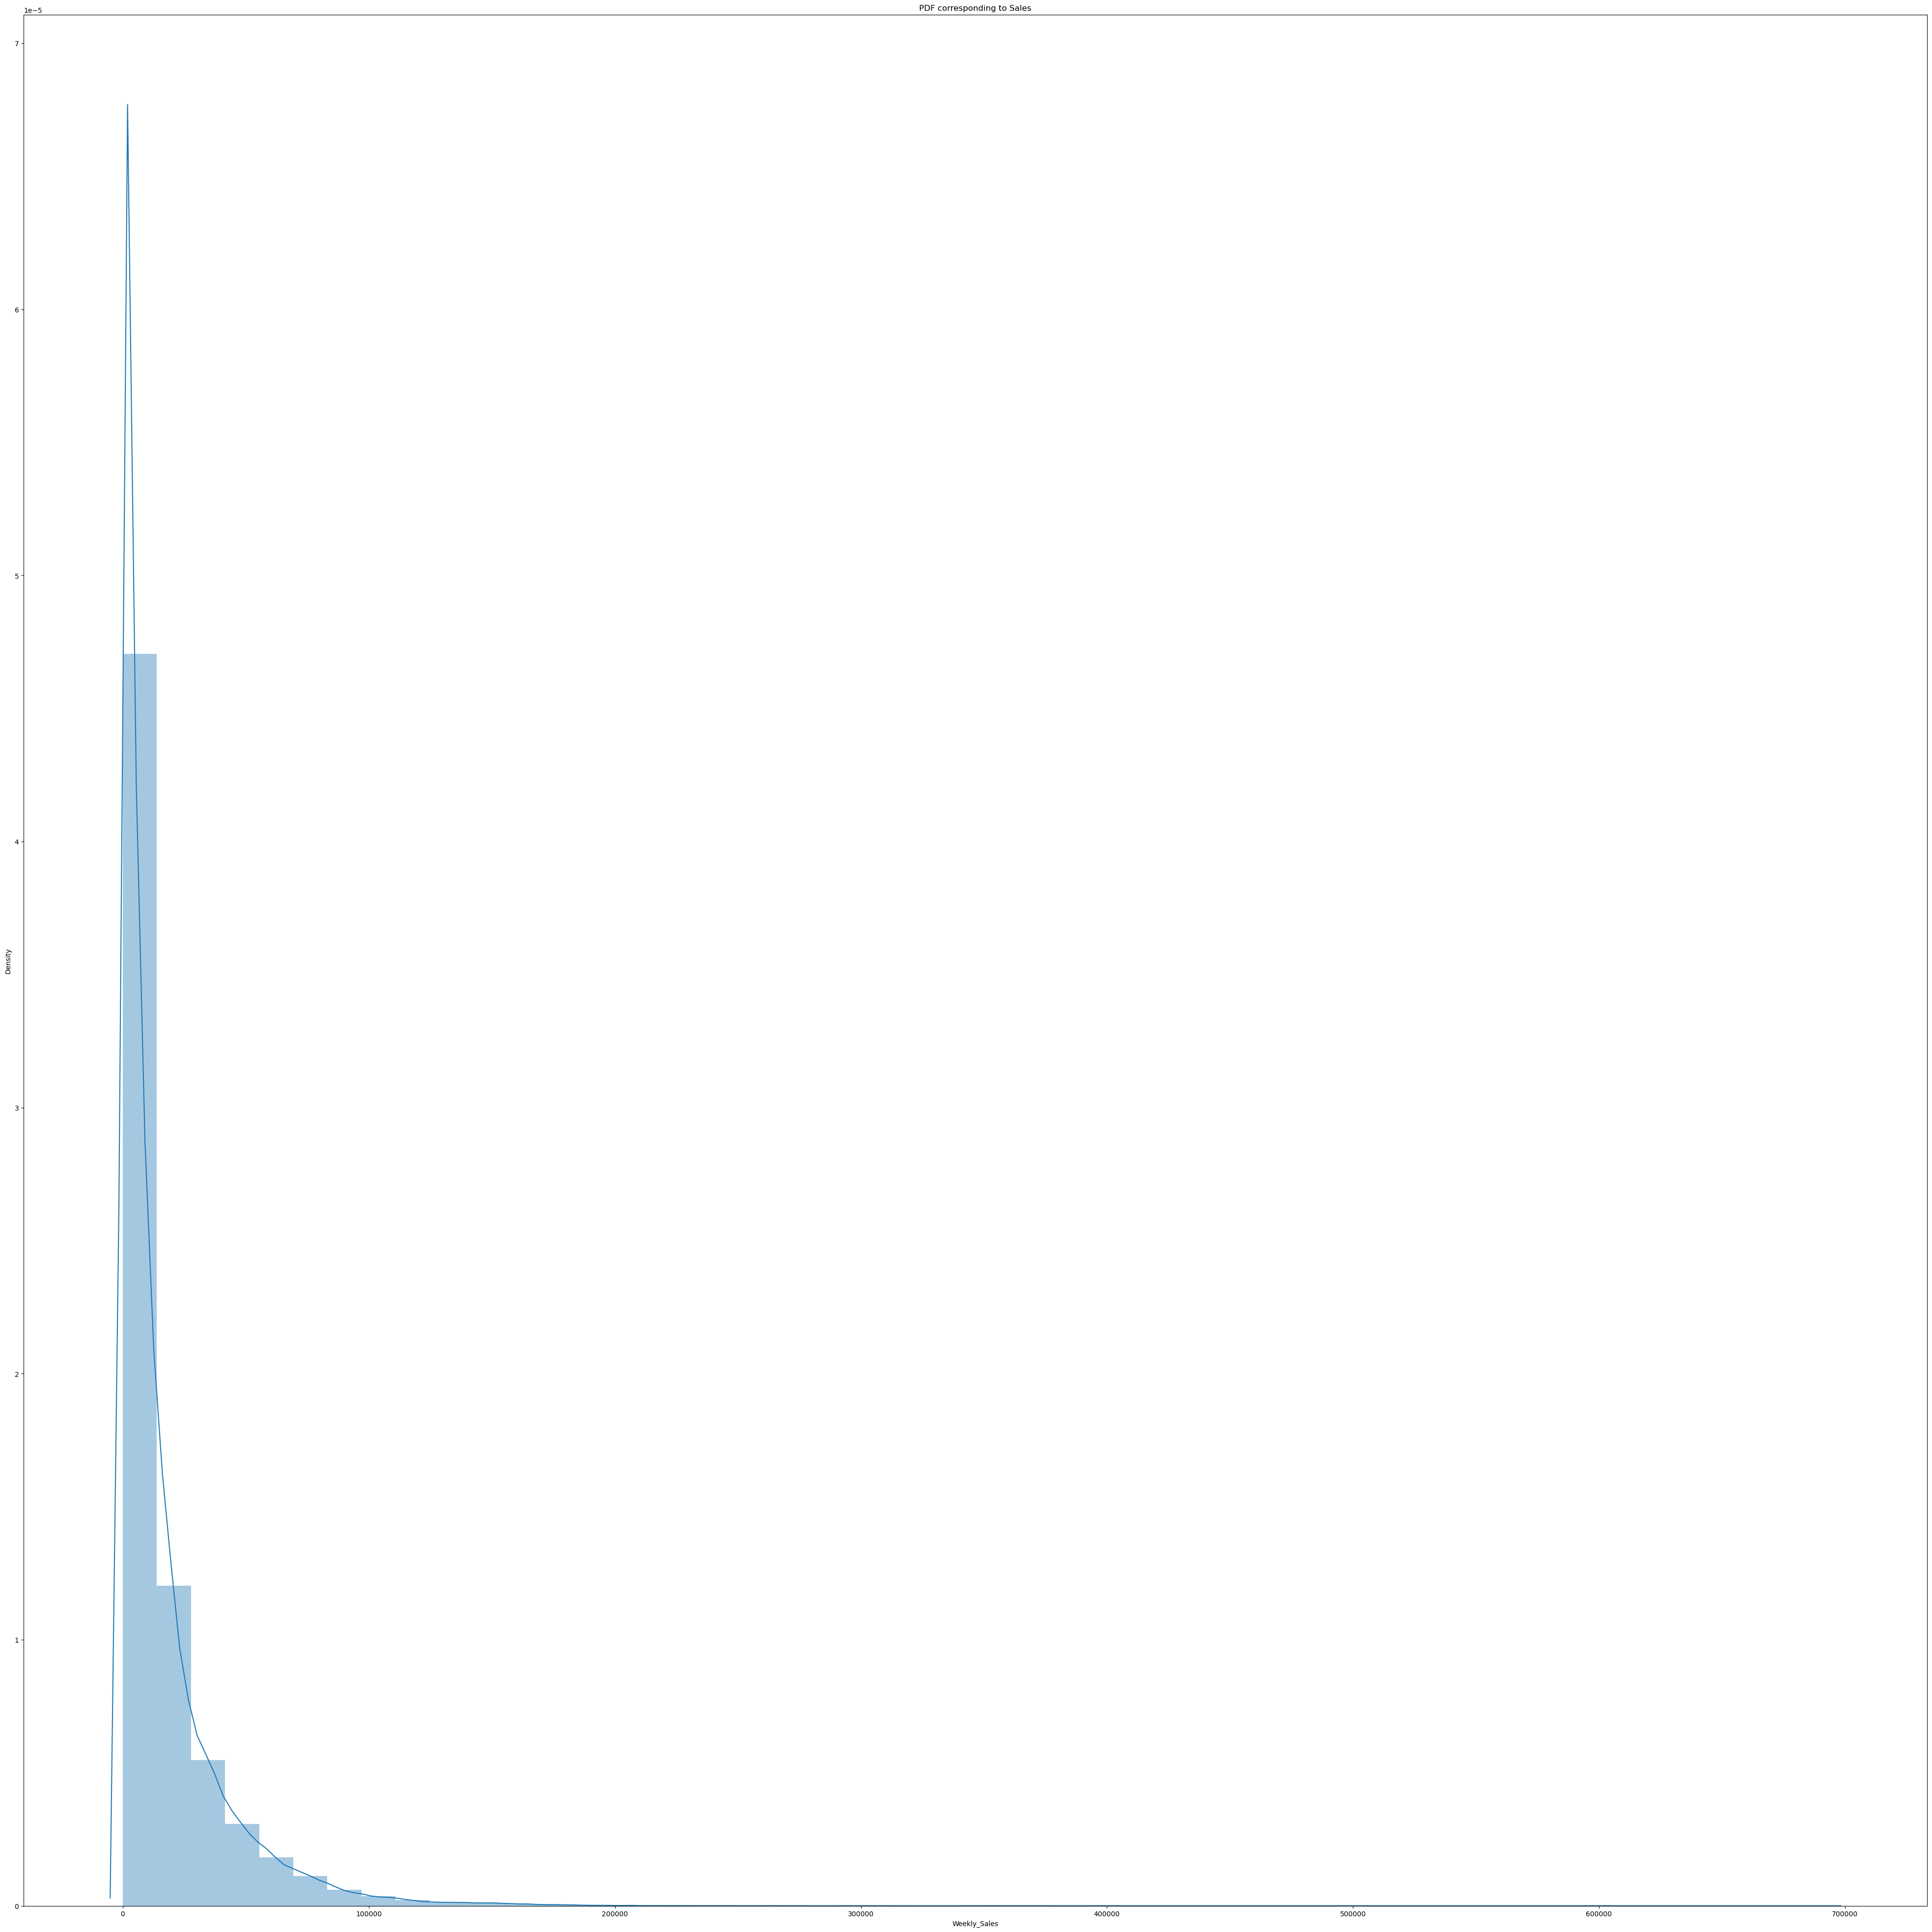

In [71]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.distplot(train['Weekly_Sales'])
plt.title("PDF corresponding to Sales")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

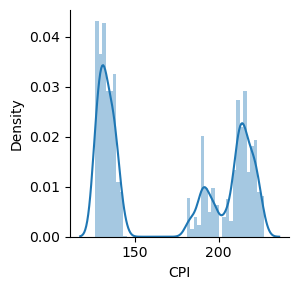

In [72]:
sns.FacetGrid(train).map(sns.distplot,"CPI").add_legend();
plt.show

Between 150 to 170 value of CPI there is no datapoint.

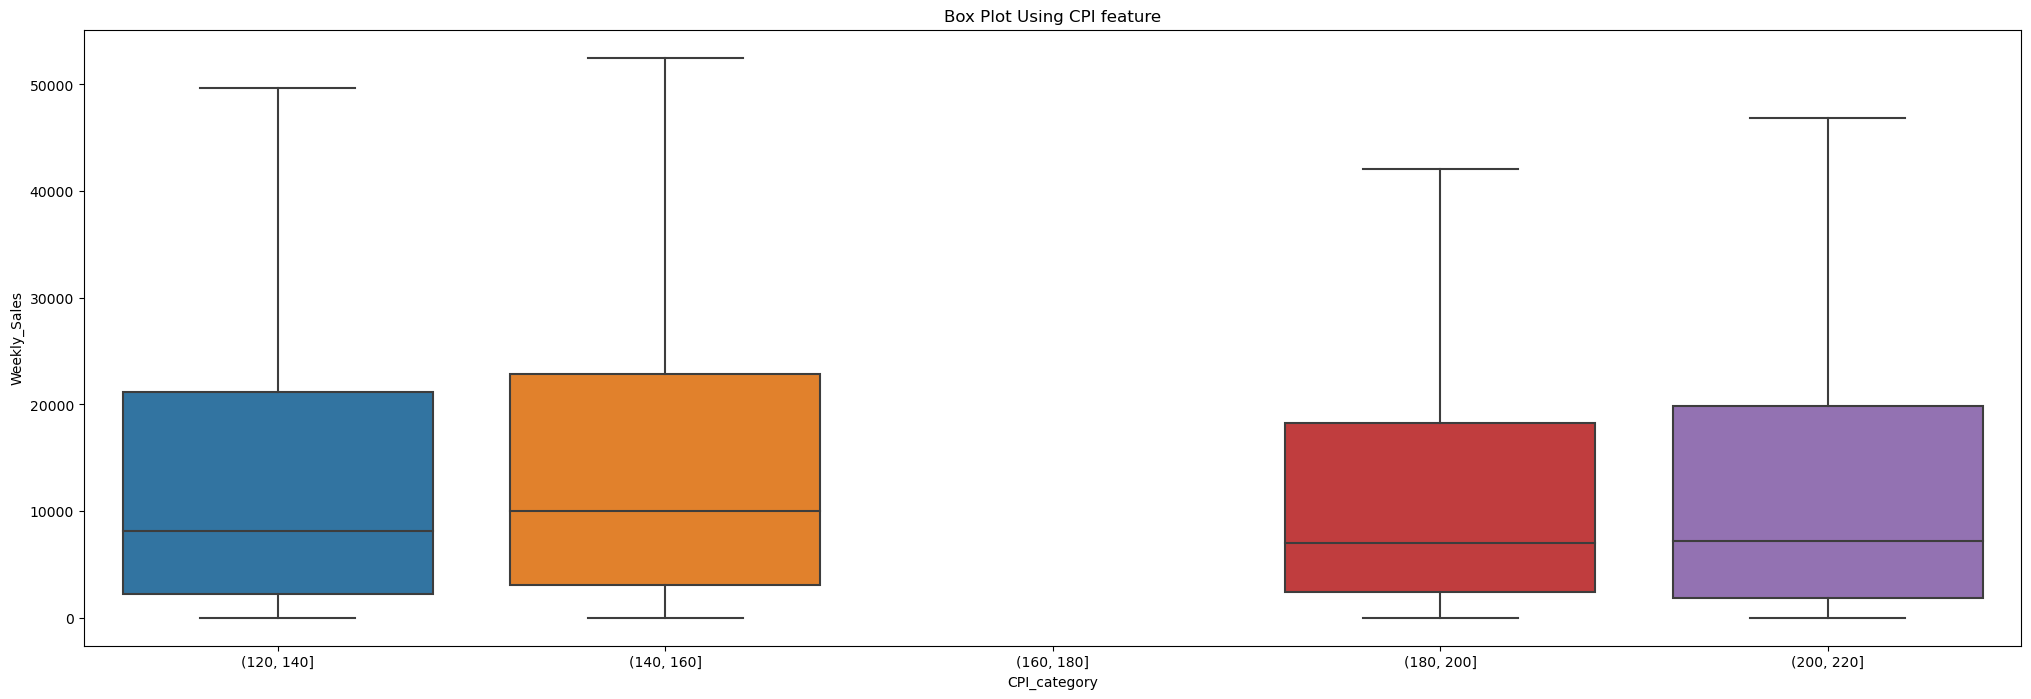

In [73]:
train['CPI_category'] = pd.cut(train['CPI'],bins=[120,140,160,180,200,220])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='CPI_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

CPI between 160 to 180 as no datapoints so no sales. apart from that not much difference while change in the CPI during that period.

<function matplotlib.pyplot.show(close=None, block=None)>

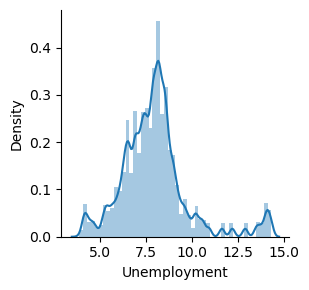

In [74]:
sns.FacetGrid(train).map(sns.distplot,"Unemployment").add_legend();
plt.show

Most of the point lies when umployement rate is 8.

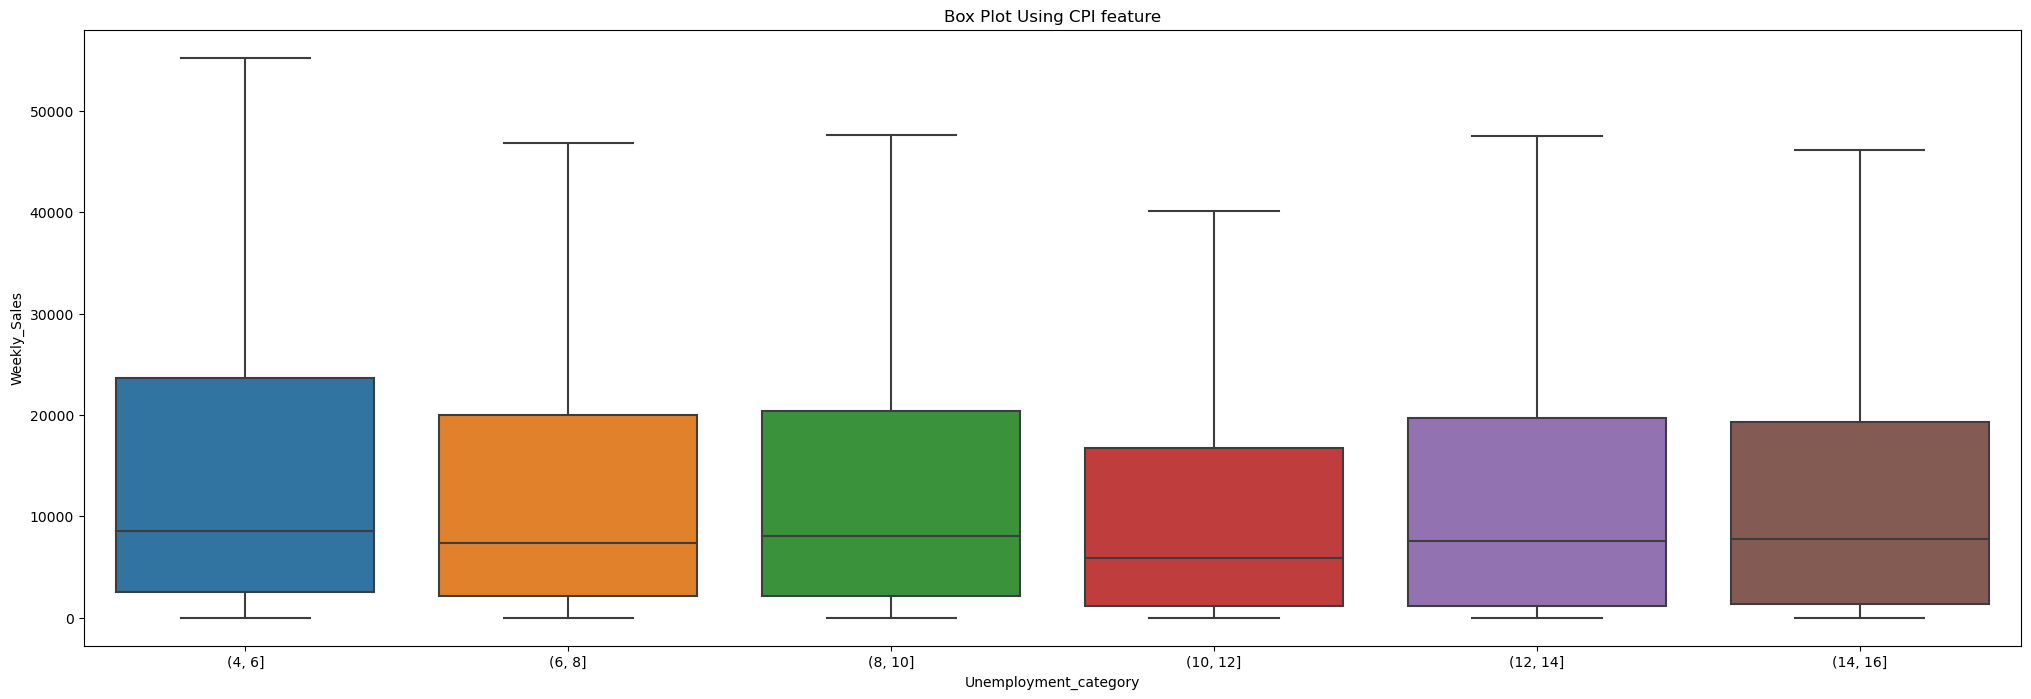

In [75]:
train['Unemployment_category'] = pd.cut(train['Unemployment'],bins=[4,6,8,10,12,14,16])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Unemployment_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Unemployment_category  feature")
plt.show()

Mean value of all box plot range are comparartively equal so it is not useful in determining sales of store.so it can be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

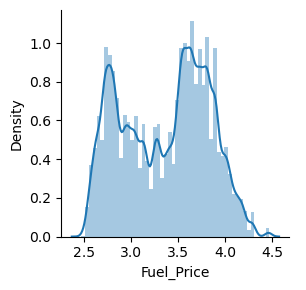

In [76]:
sns.FacetGrid(train).map(sns.distplot,"Fuel_Price").add_legend();
plt.show

Here it looks no of datapoints are higher when fuel rate was between 3.5 to 4.0 and 2.5-3.0.

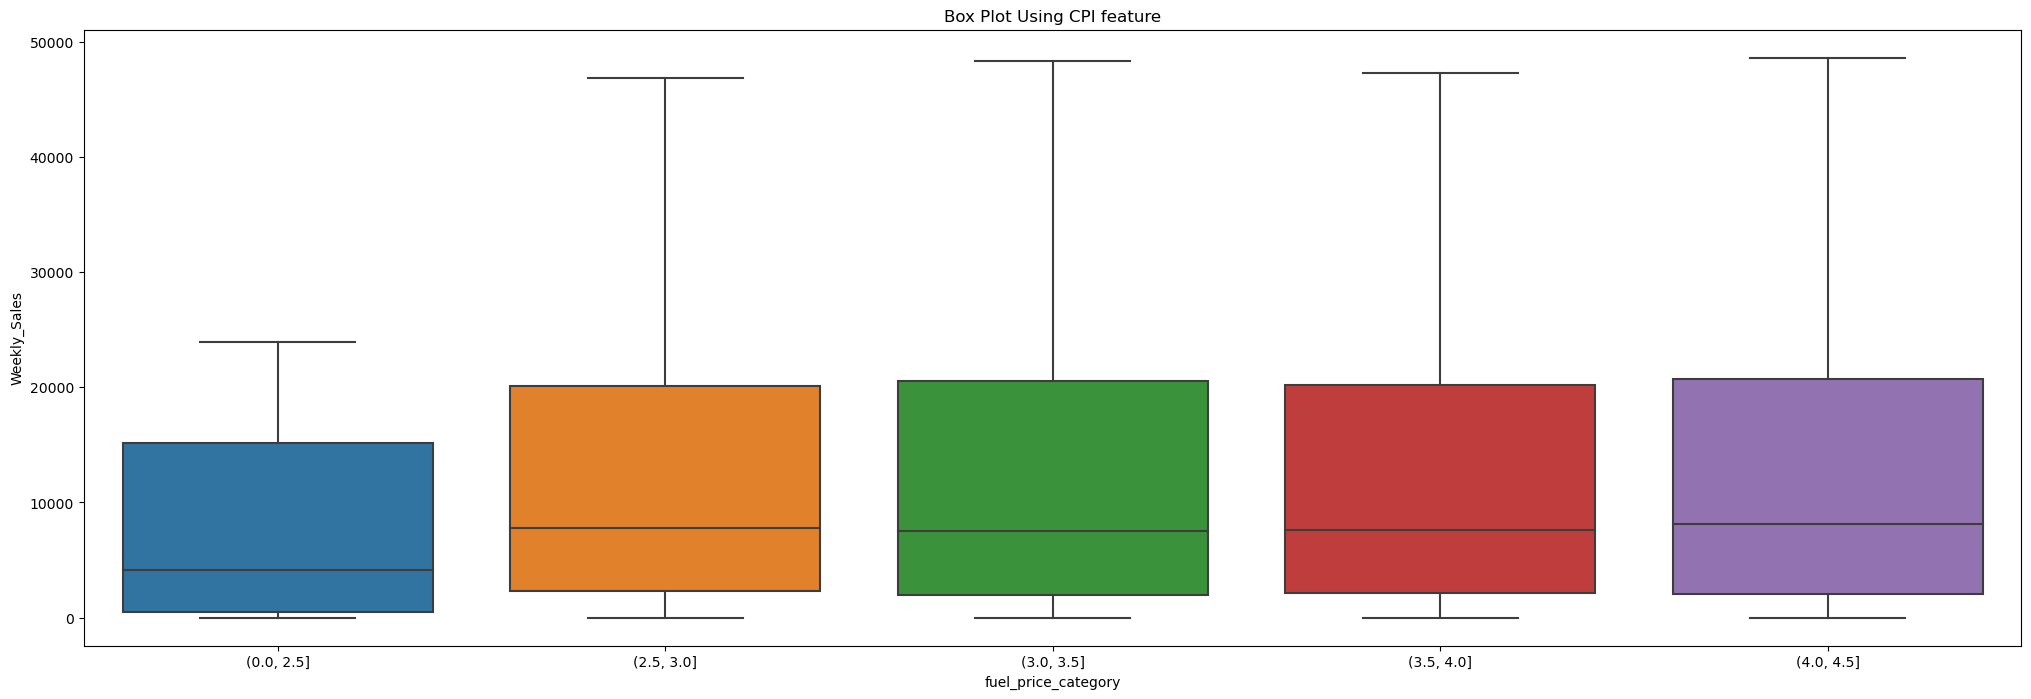

In [77]:
train['fuel_price_category'] = pd.cut(train['Fuel_Price'],bins=[0,2.5,3,3.5,4,4.5])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='fuel_price_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using fuel_price_category feature")
plt.show()

Fuel price has very less impact on sales as there is no change in sales as price increasing.So this feature can also be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

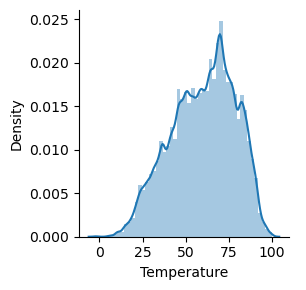

In [78]:
sns.FacetGrid(train).map(sns.distplot,"Temperature").add_legend();
plt.show

Through here it can be seen that most of the data point lies in 60-80 F temperatures assuming most of the sales also happens here.

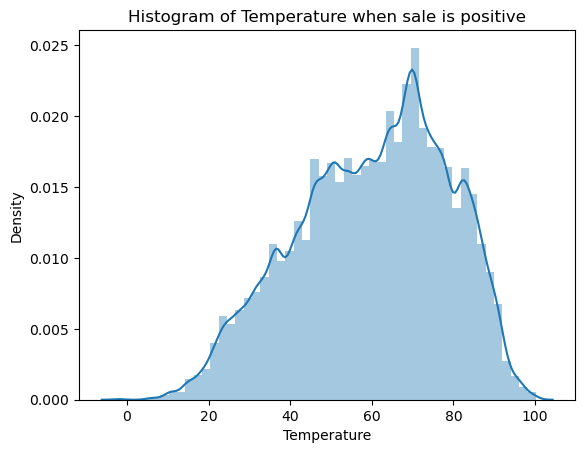

In [79]:
positive_temperature = train[train['Weekly_Sales']>0]['Temperature']
sns.distplot(positive_temperature)
plt.title("Histogram of Temperature when sale is positive")
plt.show()

This graph is also telling the same thing that 60-80 F temperature have more number of times of sale.

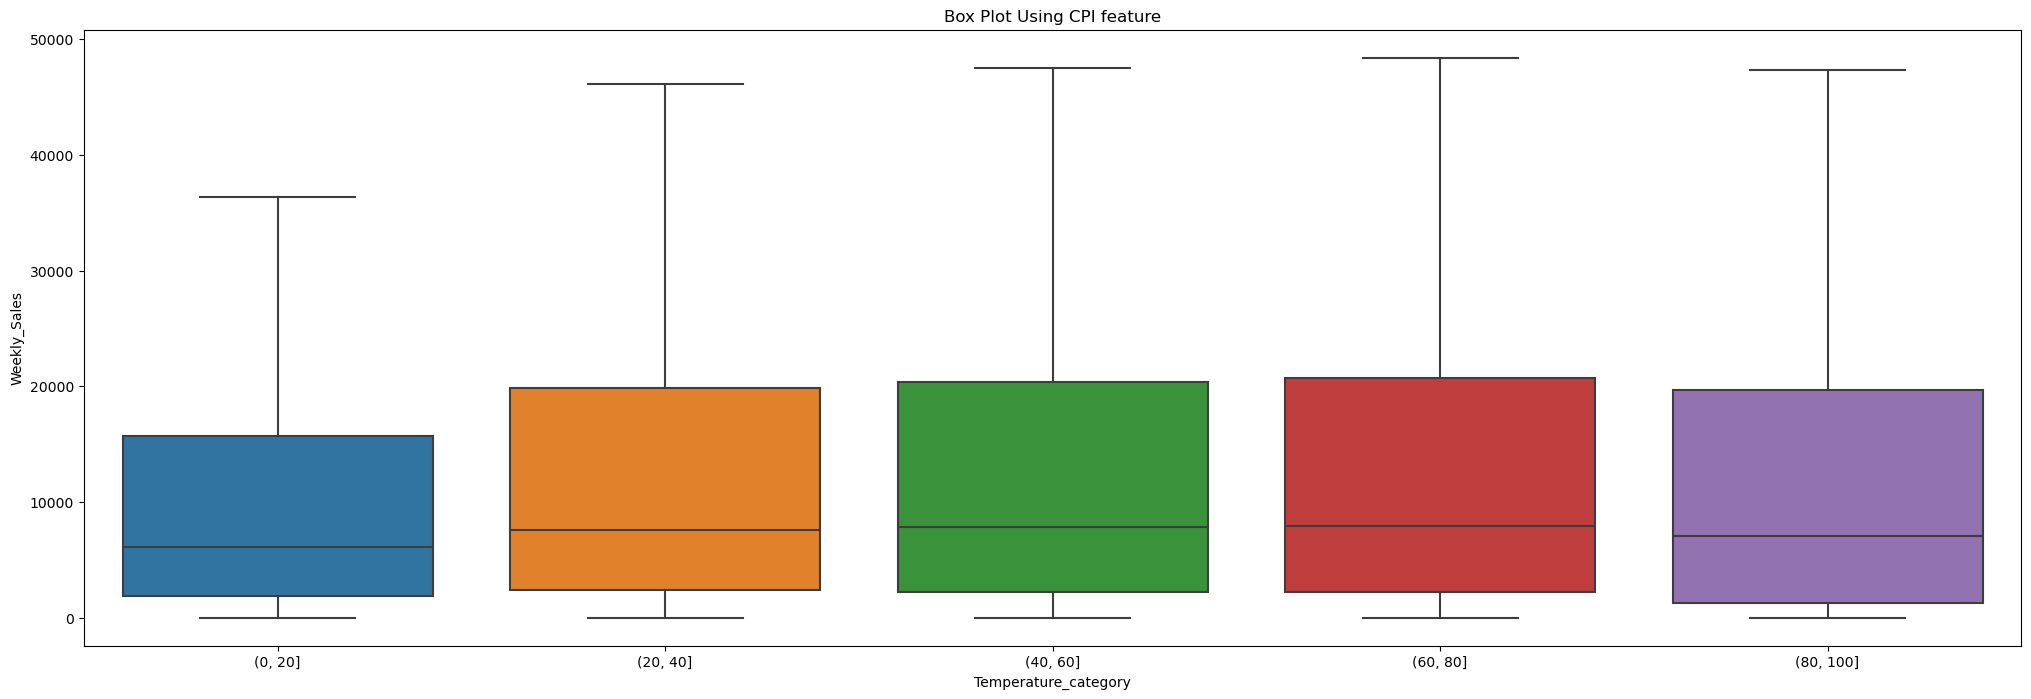

In [80]:
train['Temperature_category'] = pd.cut(train['Temperature'],bins=[0,20,40,60,80,100])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Temperature_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Temperature_category feature")
plt.show()

Here it seems 60-80 temperature have almost same sale as in other category of temperature.So this feature can also be removed.

In [81]:
g = train.groupby(["Month","Store"])
monthly_averages = g.aggregate({"Weekly_Sales":np.mean})
store_value=monthly_averages.loc[monthly_averages.groupby('Month')['Weekly_Sales'].idxmax()]
print("Stores which have highest value during that  Month: ")
store_value

Stores which have highest value during that  Month: 


,,Weekly_Sales
Month,Store,
1,4,26792.255620
2,20,30499.281528
3,14,28550.643923
4,14,29557.689553
5,14,29439.083763
6,20,30032.278419
7,20,28916.581834
8,4,29082.862586
9,20,28006.353978


1. It can be seen that 3 stores are more prominent than all others. Store 20 has highest Sale during Thanksgiving and Christmas which were more impactful than Labour's Day and Super Bowl.
2. As we can see that thanksgiving and christmas are more impactful than other two.so every holiday has its own level of impact .So we can make a category of holidays as feature.

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  420285 non-null  int64         
 1   Dept                   420285 non-null  int64         
 2   Date                   420285 non-null  datetime64[ns]
 3   Weekly_Sales           420285 non-null  float64       
 4   IsHoliday              420285 non-null  int32         
 5   Year                   420285 non-null  int64         
 6   Month                  420285 non-null  int64         
 7   Week                   420285 non-null  int64         
 8   Day                    420285 non-null  int64         
 9   n_days                 420285 non-null  int64         
 10  Type                   420285 non-null  object        
 11  Size                   420285 non-null  int64         
 12  Temperature            420285 non-null  floa

Creating dateset for training purpopse

In [83]:
storetype_values = {'A':3, 'B':2, 'C':1}
train['Type_Numeric'] = train.Type.map(storetype_values)
test['Type_Numeric'] = test.Type.map(storetype_values)

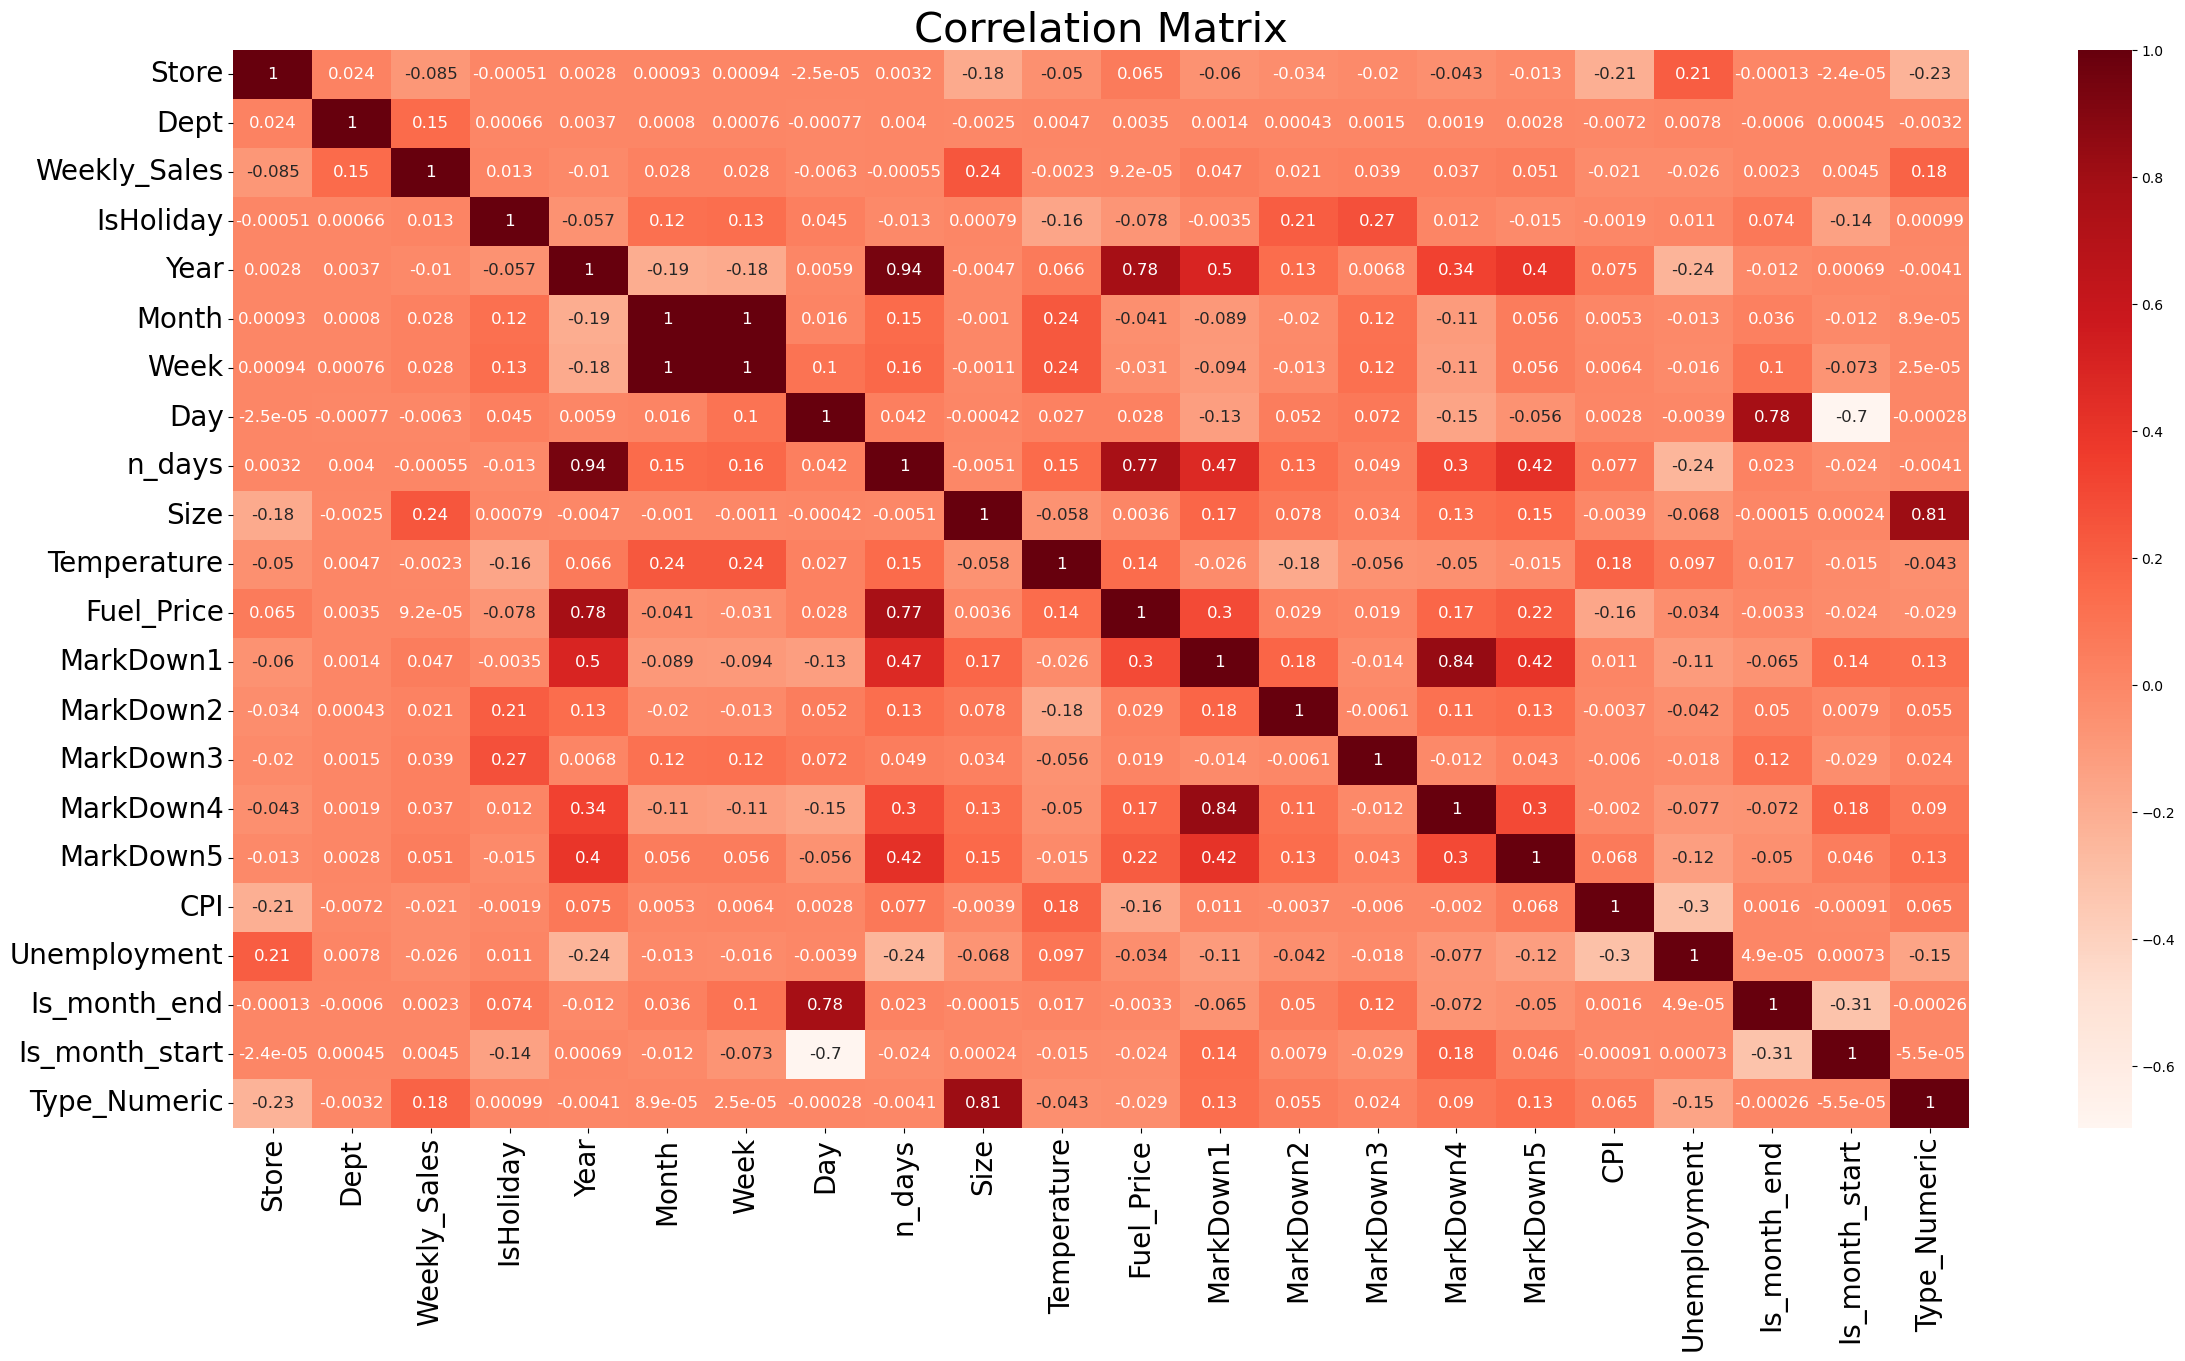

In [84]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(train.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

1. Department, Store size and Type have moderate correlation with the weekly sales
2. Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out
3. Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out
4. IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks
5. We will also leave out Month and Day as this information is already contained in the WeekOfYear

Data preparation for Model Training

In [85]:
train = train.drop(['Date', 'Temperature','Fuel_Price', 'Type','Temperature_category','fuel_price_category','Unemployment_category','CPI_category','Is_month_start','Is_month_end','n_days', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

test = test.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'n_days','Month','Day', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis=1)

In [87]:
# Identify input and target columns
import joblib
input_cols = train.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = train[input_cols].copy()
targets = train[target_col].copy()
# Scale the values

from sklearn.preprocessing import MinMaxScaler
scaler_filename = "scaler.save"
scaler = MinMaxScaler().fit(train[input_cols])
joblib.dump(scaler, scaler_filename)
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
test[input_cols] = scaler.transform(test[input_cols])

In [87]:
# Create training and validation sets
#X_train = train_inputs
#x test = val_inputs
#y train = train_targets
#y_test = val_targets

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

# Define the function to evaluate the models

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

DECISION TREE

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on traing data
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is  {}.'.format(tree_train_wmae))


# Compute WMAE on validation data
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(tree_val_wmae))

The WMAE loss for the training set is  0.0.
The WMAE loss for the validation set is  1910.91.


In [89]:
tree.score(train_inputs,train_targets)

1.0

In [90]:
tree.score(val_inputs,val_targets)

0.9617494374648088

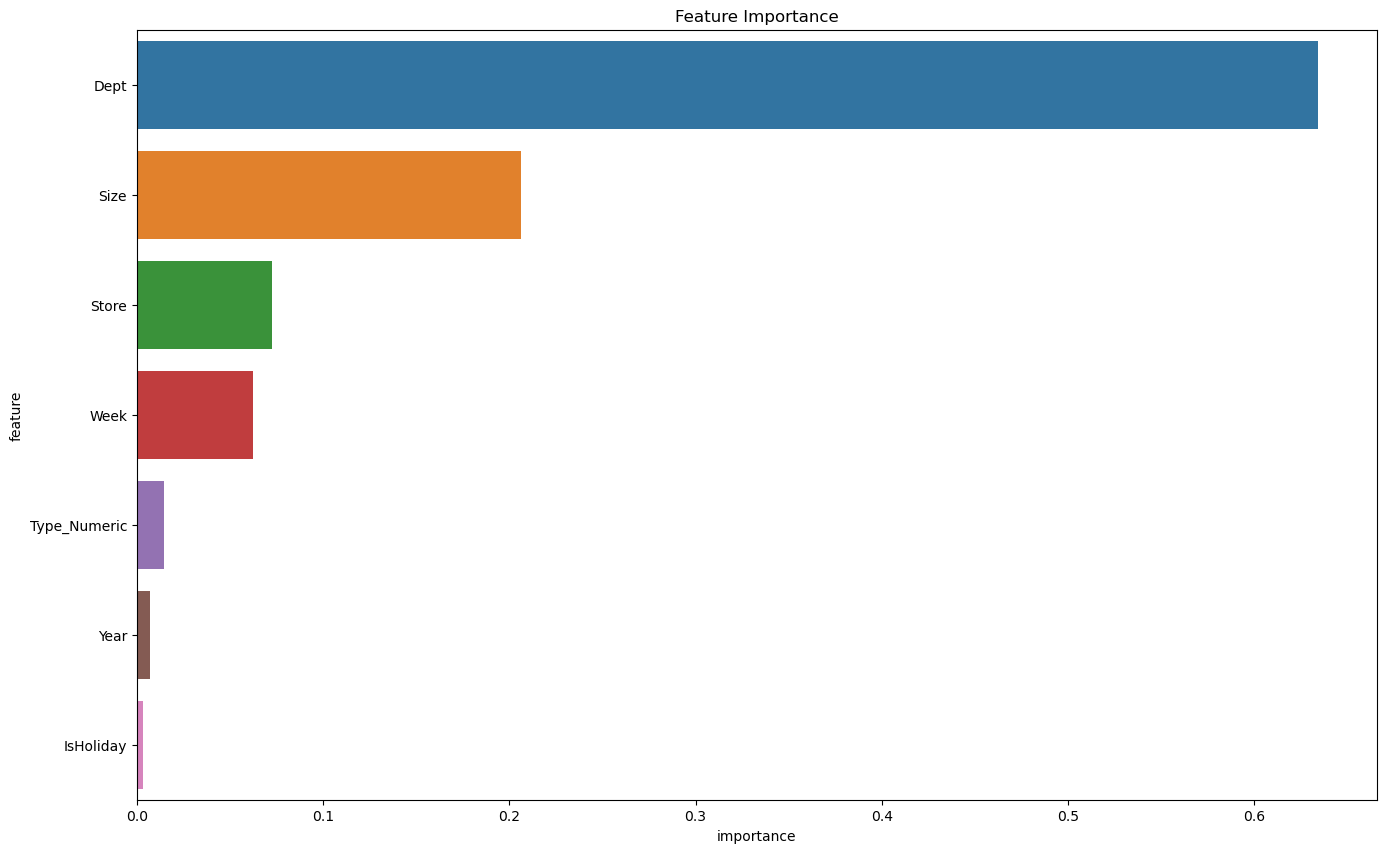

In [91]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

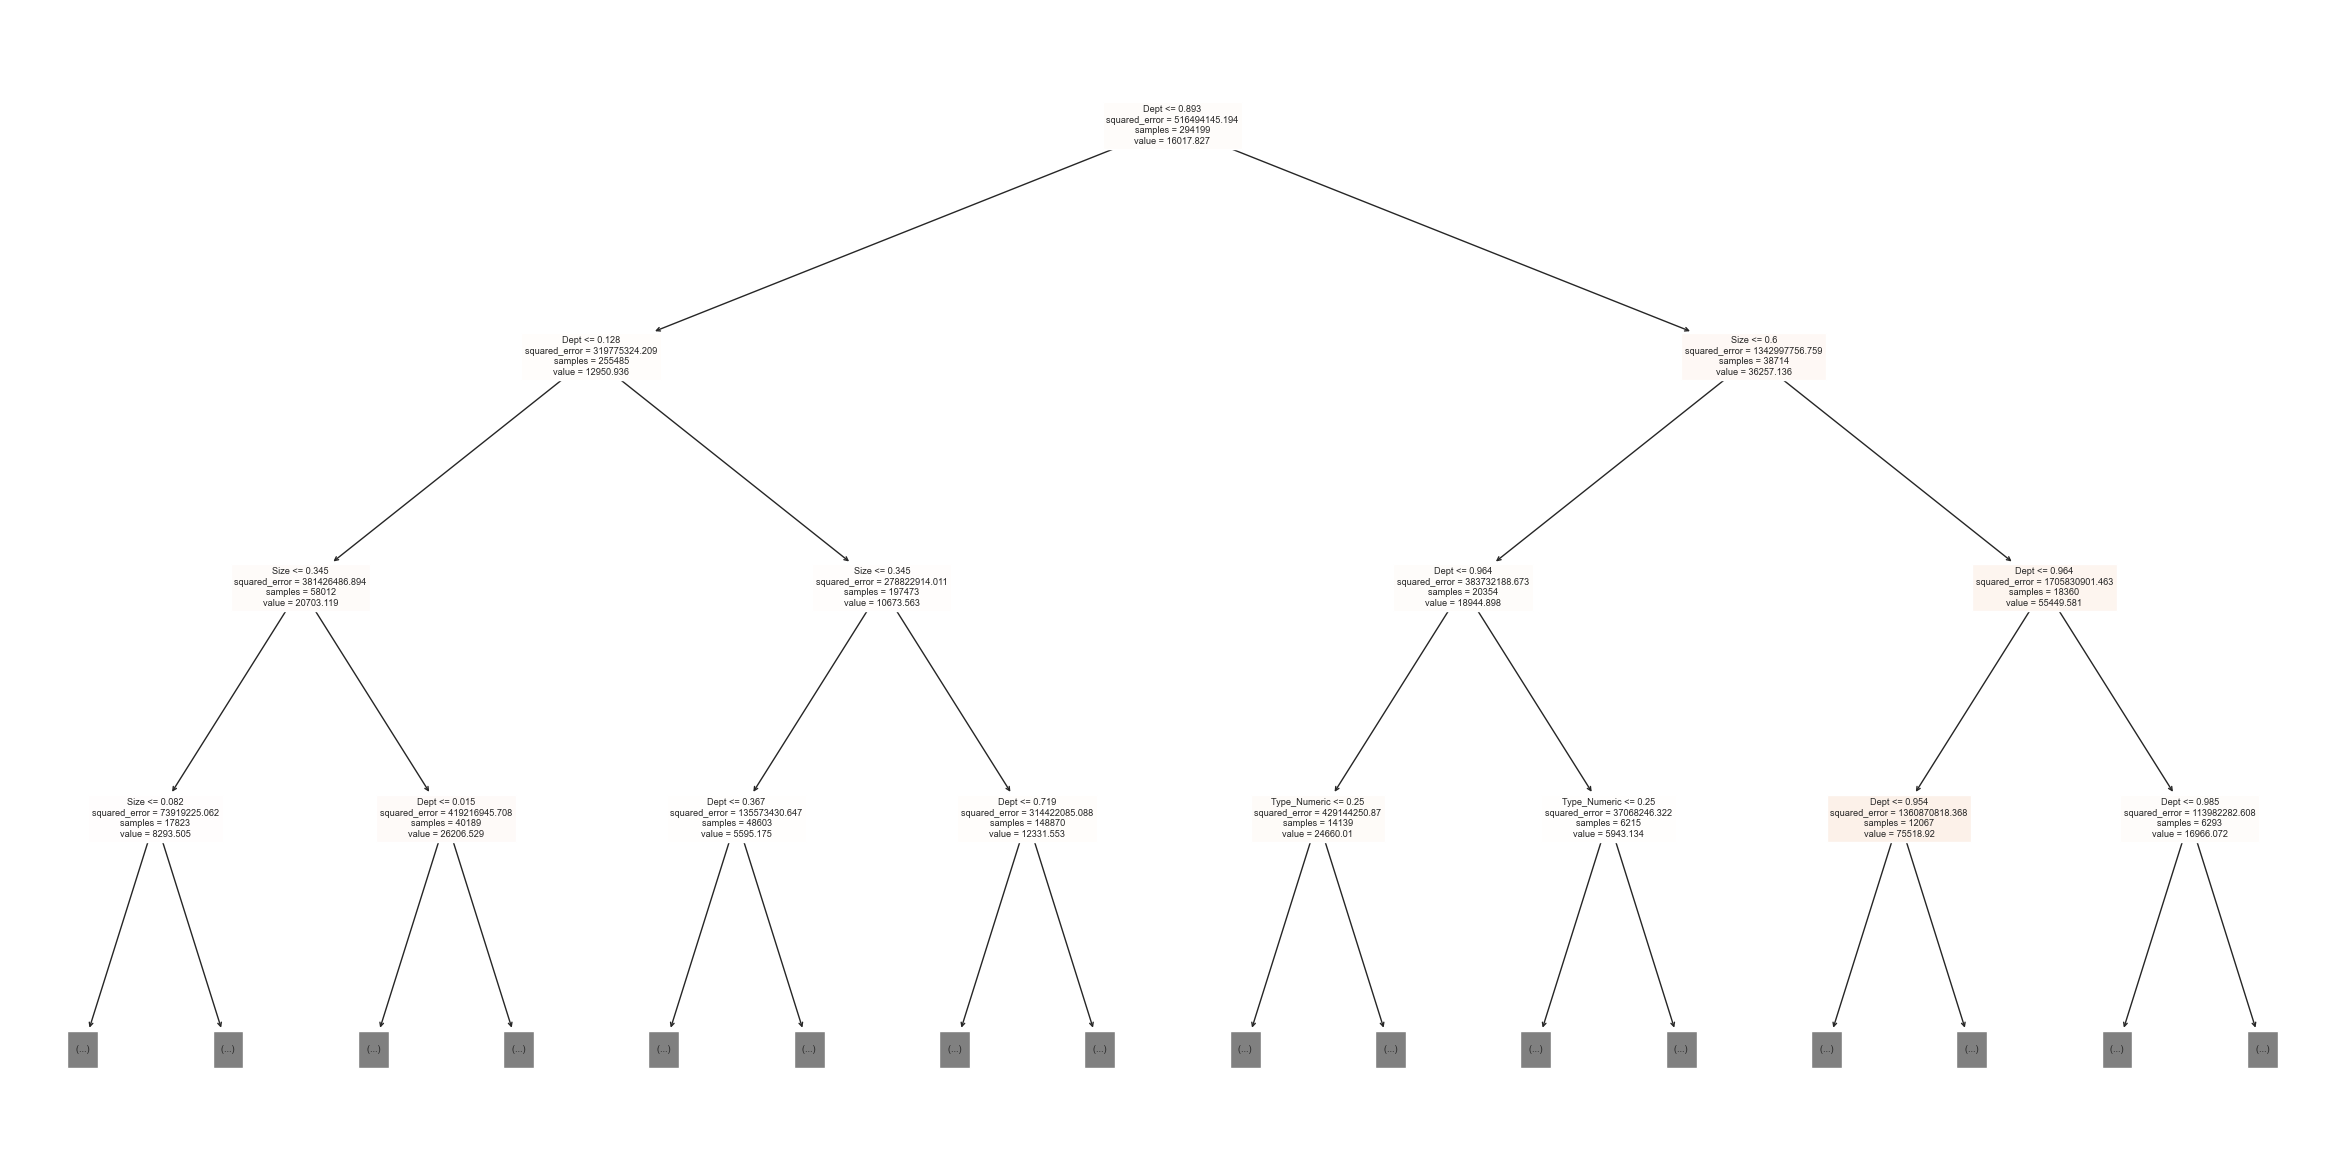

In [92]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  571.92.
The WMAE loss for the validation set is  1575.98.


In [94]:
rf1.score(val_inputs,val_targets)

0.9758290638810414

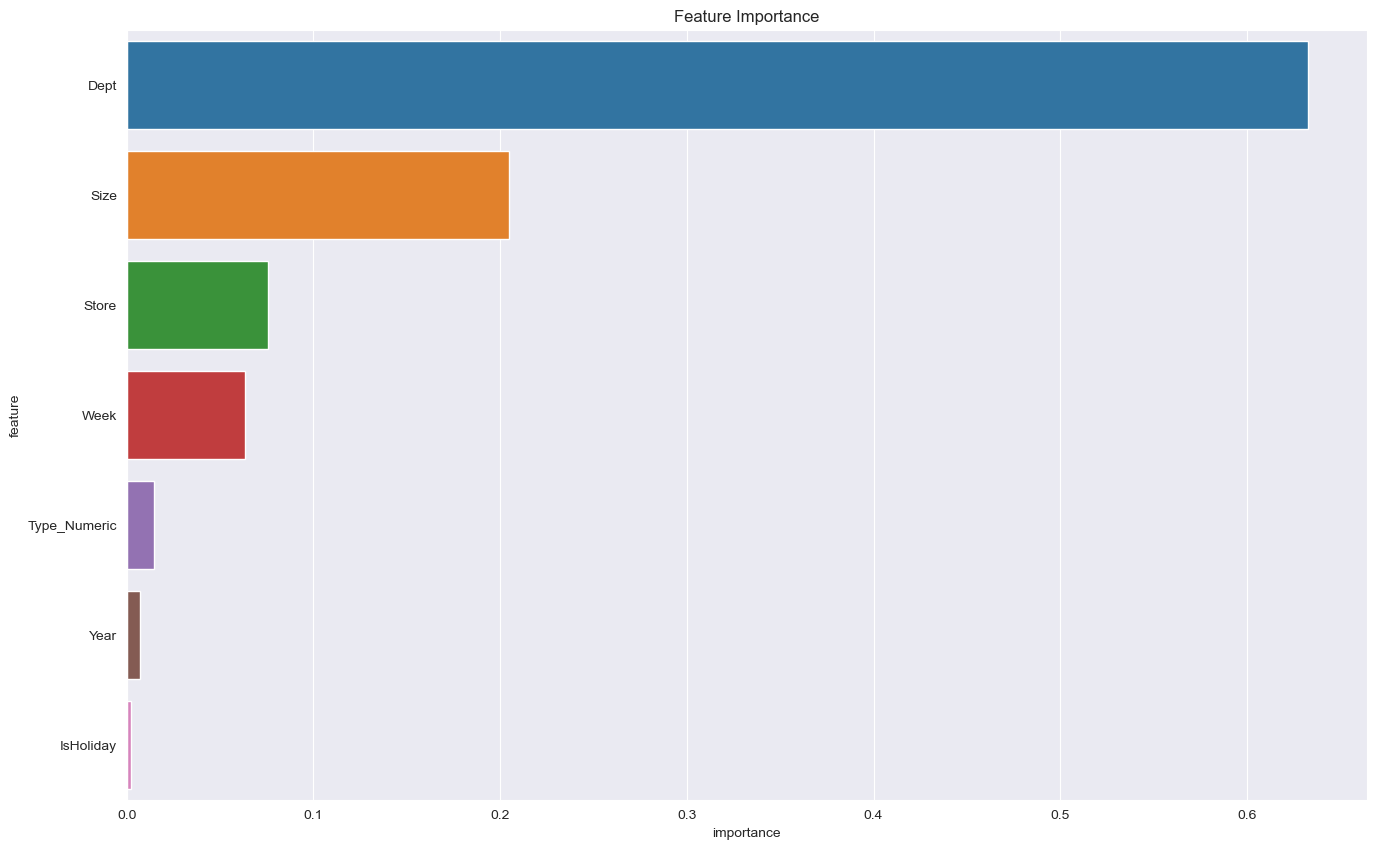

In [95]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

For the Random Forest also, the Department, Store Size and Store Number have higher model importances than the other parameters

Tuning of Random Forest Parameters

1. Let's define two functions which assist the tuning of hyper parameters.

2. 'test_params' takes the parameters of Random Forest and train the model. After that it make predictions of the training and validation and return weighted mean averaged error for the traing and validation data.

3. 'test_param_and_plot' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [96]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [97]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

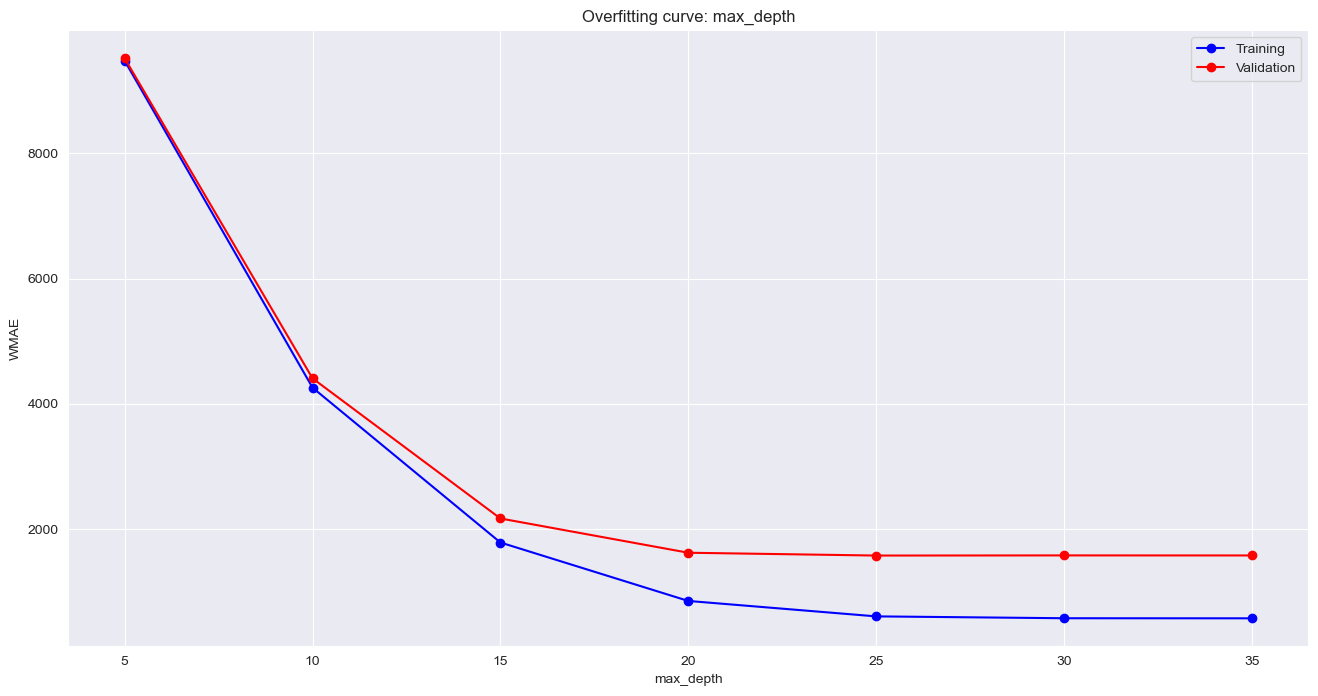

In [98]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

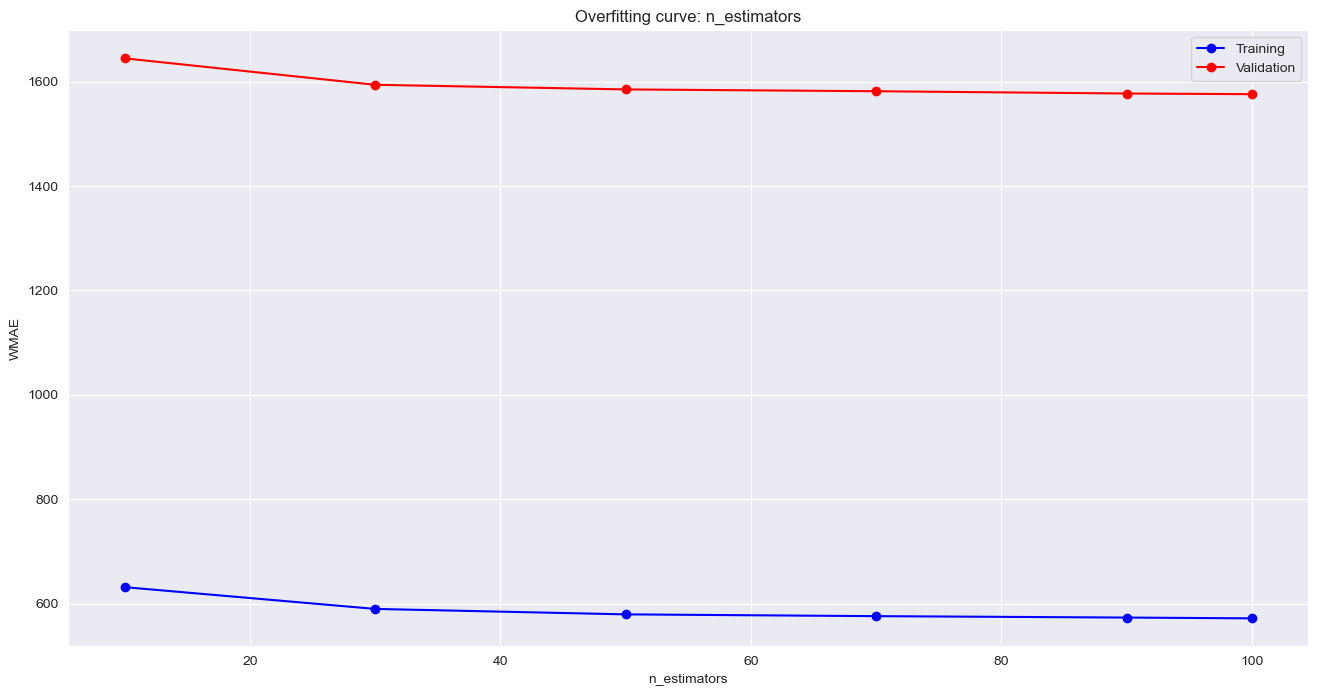

In [99]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])

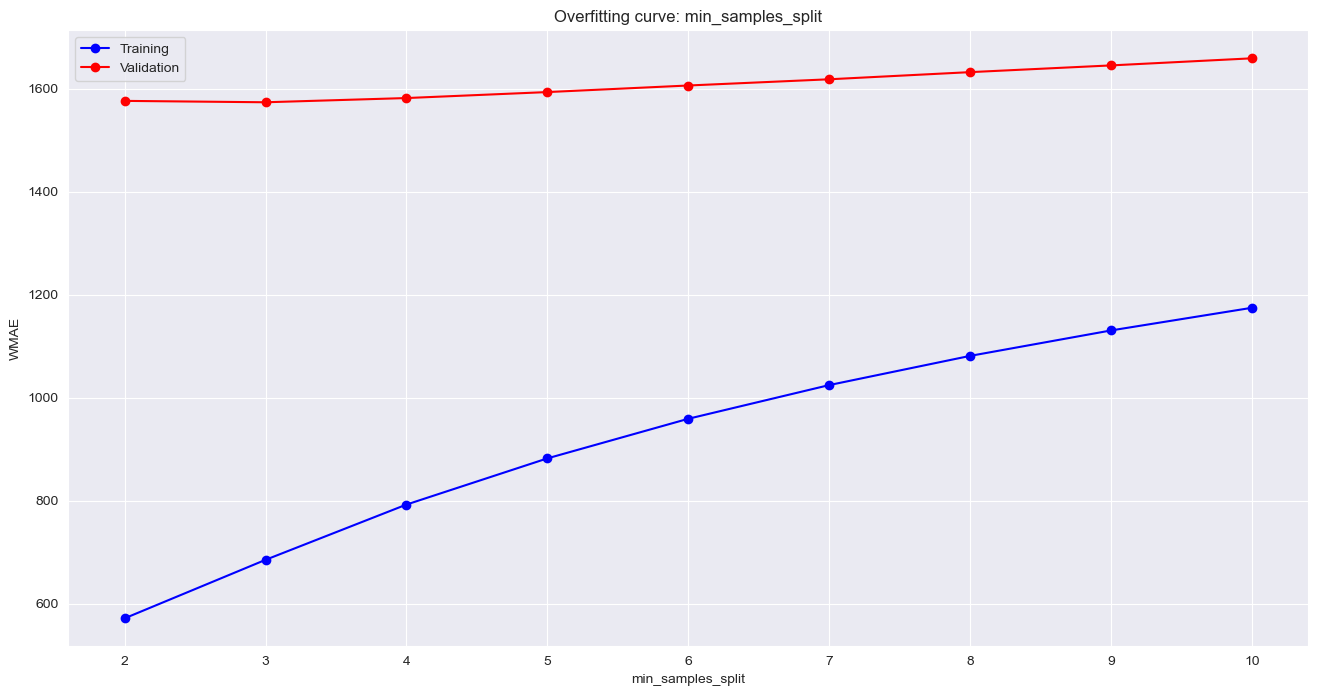

In [100]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])


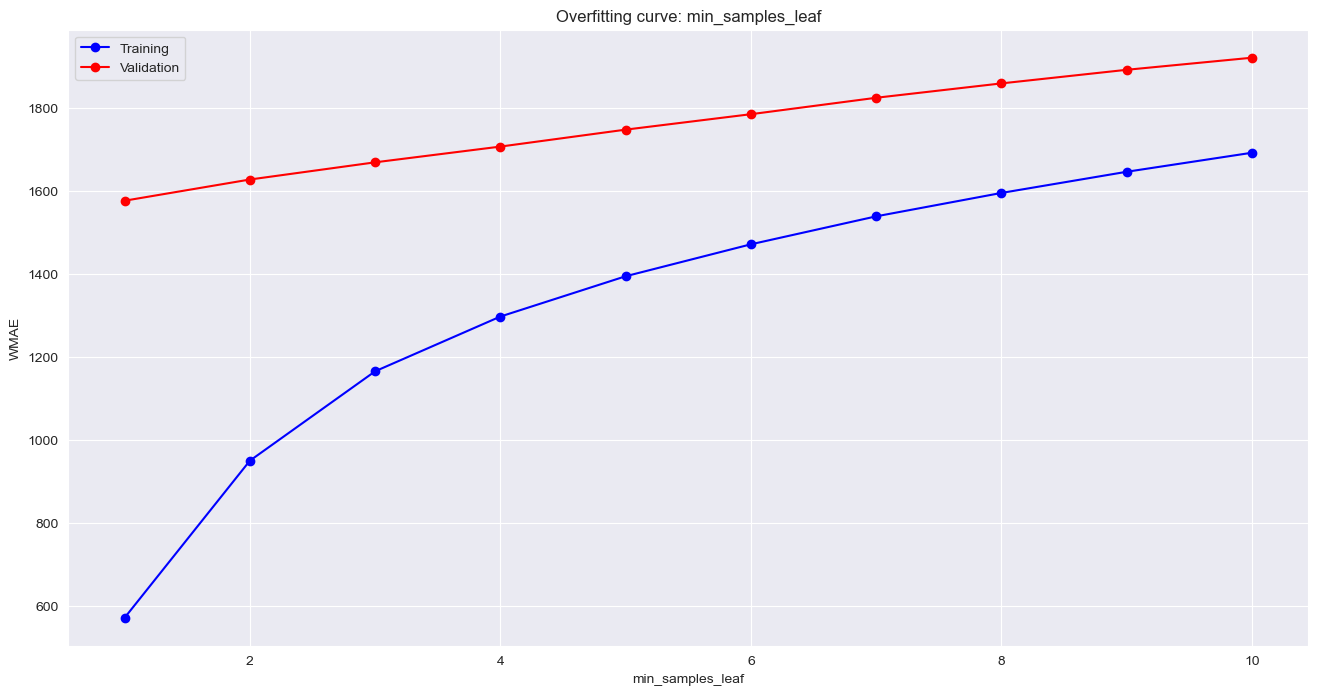

In [101]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

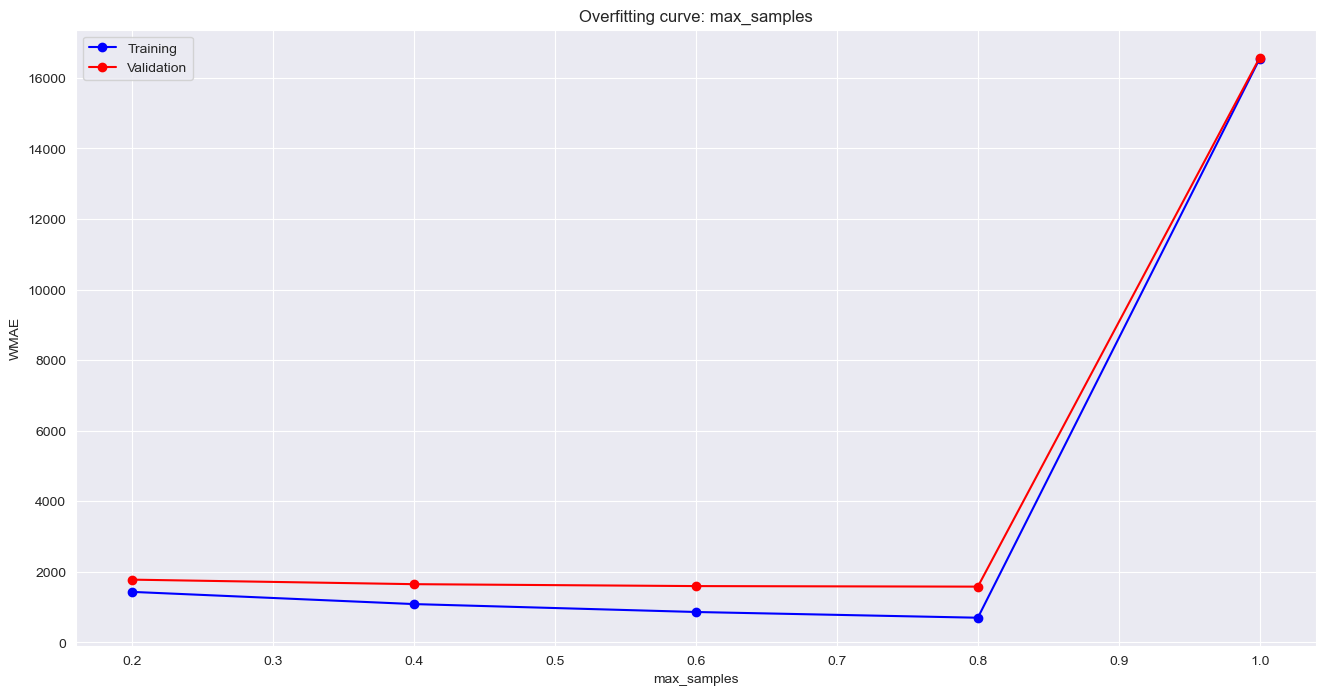

In [102]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 30

n_estimators: 100

min_samples_split: 2

min_samples_leaf: 1

max_samples: 0.8

max_features: 7

These parameters were tuned one at a time but they are somehow interrelated and effect eachother but from this I got a rough idea where the optimal values lie. Further after simultaneously varying the parameters by making some educated guesses, I found the following parameters which give better performance than the untuned base model

max_depth: 30

n_estimators: 130

min_samples_split: 2

min_samples_leaf: 1

max_samples: 0.9999

max_features: 6

In [103]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, max_depth=30, n_estimators=130, min_samples_split=2, min_samples_leaf=1, 
                            max_samples=0.99999, max_features=6,  random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  569.51.
The WMAE loss for the validation set is  1563.68.


In [104]:
rf1.score(val_inputs,val_targets)

0.9770954518198838

Gradient Boosting

In [105]:
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  2995.61.
The WMAE loss for the validation set is  3111.83.


In [106]:
gbm.score(val_inputs,val_targets)

0.9445943307471225

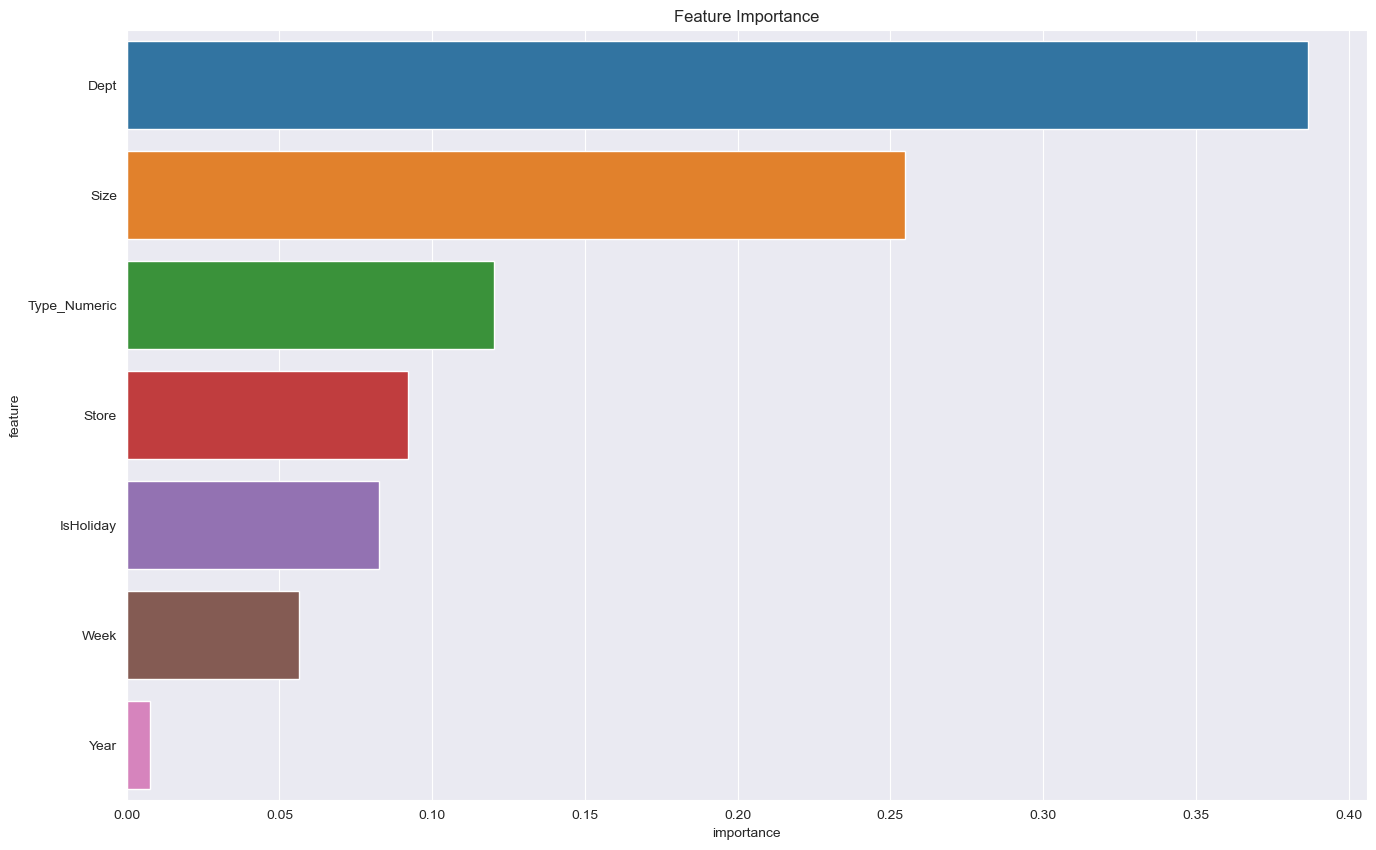

In [107]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Tuning of Model Parameters

In [108]:
def test_params_xgb(**params):  
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [109]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

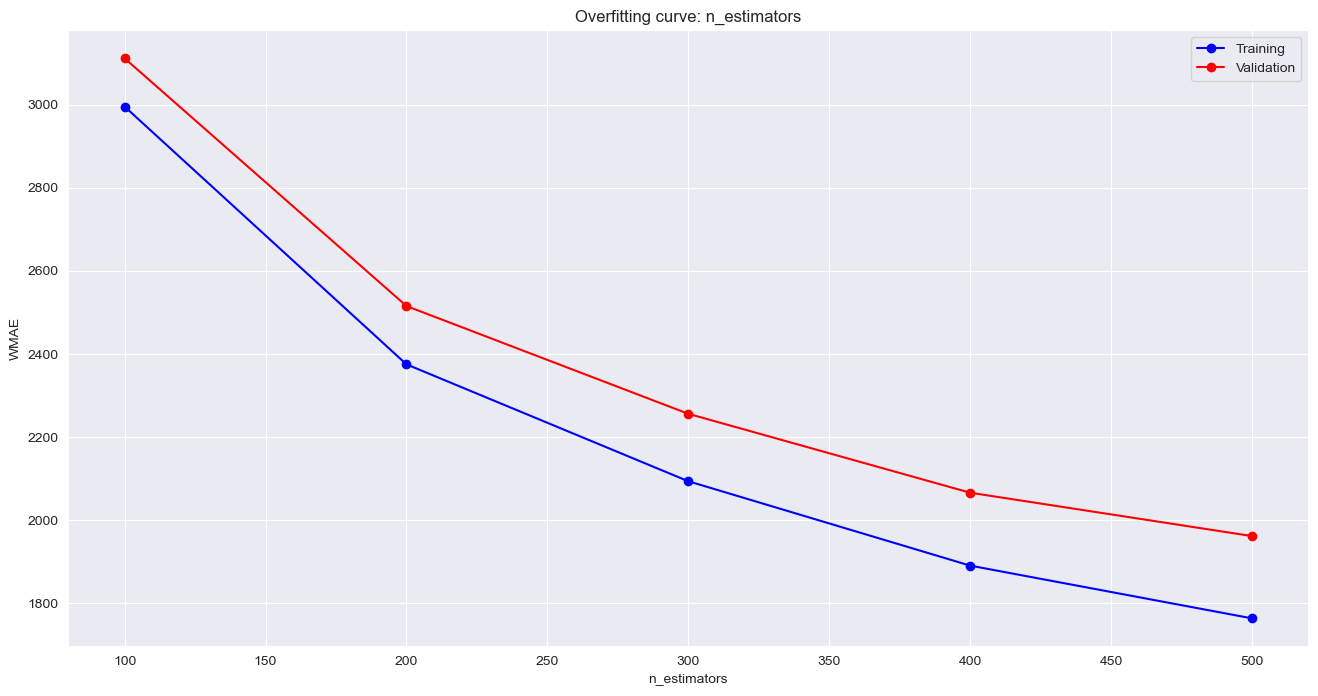

In [110]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])

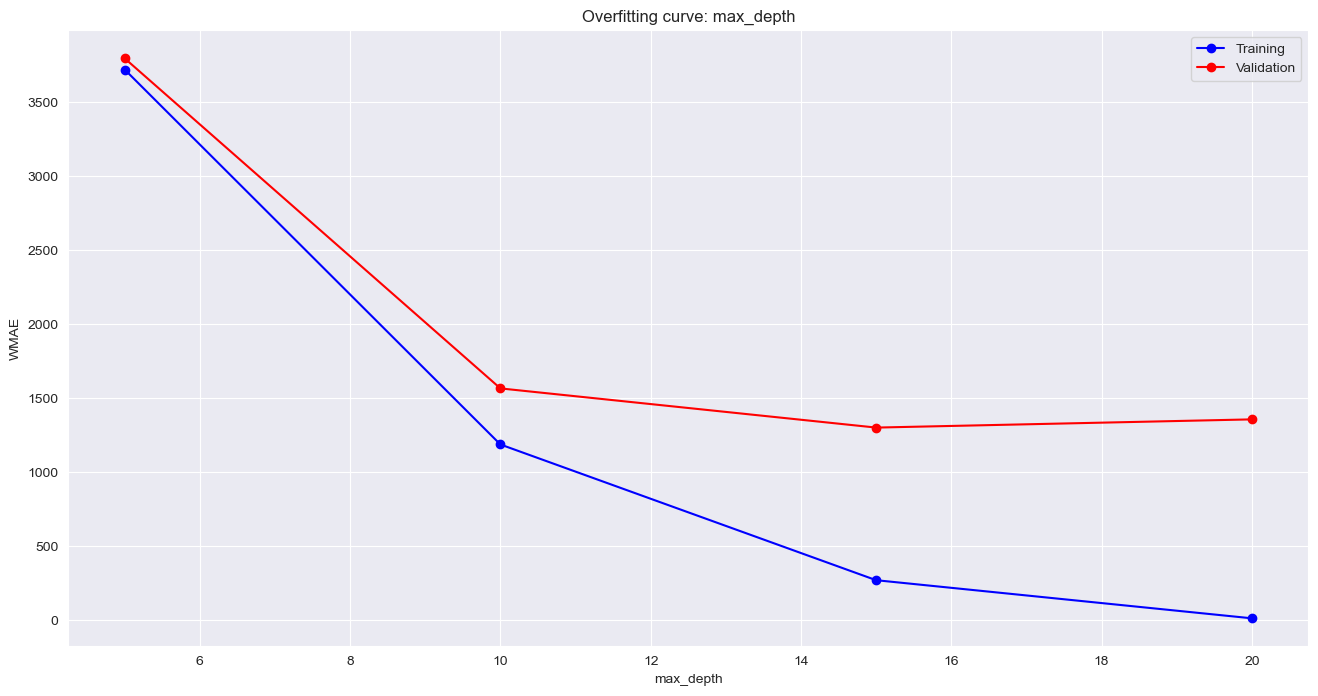

In [111]:
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])

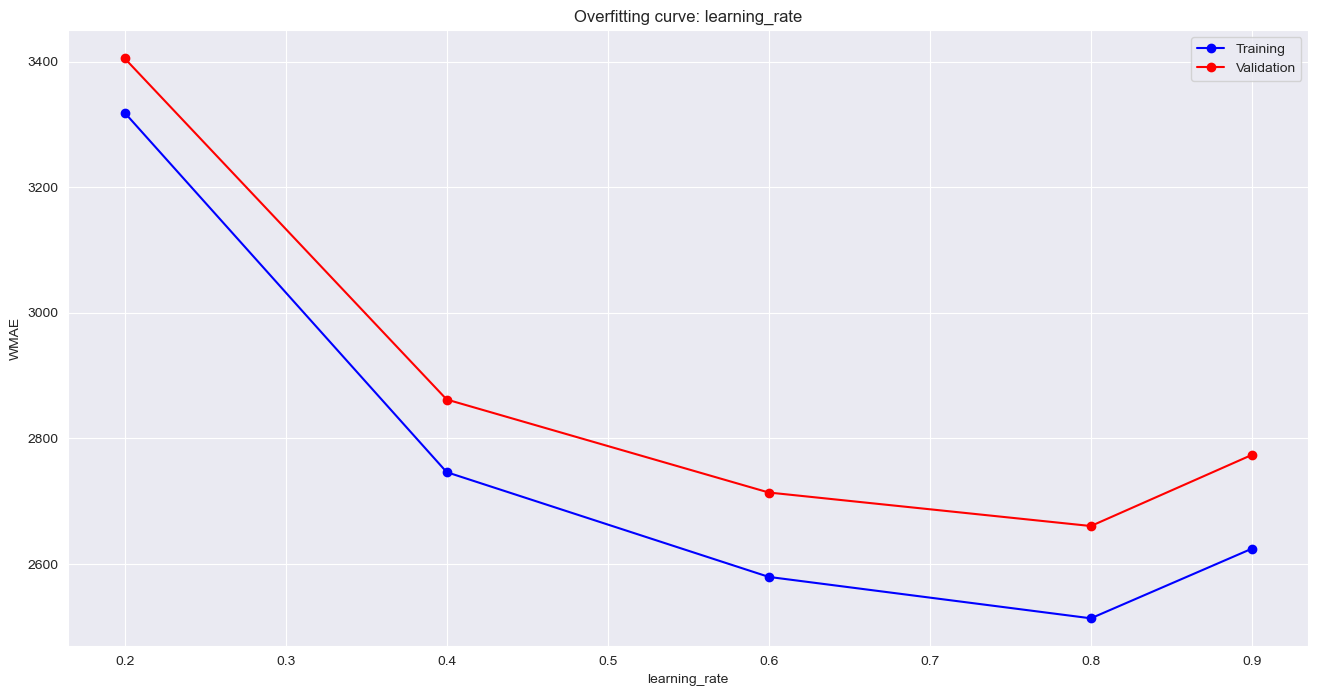

In [112]:
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 20

n_estimators: 500

learning_rate: 0.8

These parameters are varied one at a time but they both are inter related. These parameters are then varied simultaneouslyfurther fine tuning of the model by making some educated guesses and the best combination of values which minimizes the validation error are as follows:

max_depth: 15

n_estimators: 400

learning_rate: 0.35

In [113]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on test data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  15.14.
The WMAE loss for the validation set is  1328.82.


In [114]:
gbm.score(val_inputs,val_targets)

0.9854230053988478

All model Comparison :

In [115]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model" ,"Accuracy","WMAE"]
x.add_row(["Gradient Boosting", 94.4,3111.80])
x.add_row(["Decision Tree", 96.1, 1908.01])
x.add_row(["Random Forest Regression", 97.5, 1576.55])
x.add_row(["Random Forest after fine tuning", 97.6, 1566.76])
x.add_row(["Gradient Boosting after fine tuning", 98.5, 1328.82 ])

print(x)

+-------------------------------------+----------+---------+
|                Model                | Accuracy |   WMAE  |
+-------------------------------------+----------+---------+
|          Gradient Boosting          |   94.4   |  3111.8 |
|            Decision Tree            |   96.1   | 1908.01 |
|       Random Forest Regression      |   97.5   | 1576.55 |
|   Random Forest after fine tuning   |   97.6   | 1566.76 |
| Gradient Boosting after fine tuning |   98.5   | 1328.82 |
+-------------------------------------+----------+---------+


1. Lesser the value of WMAE for model, better the model performance.
2. Gradient boosting after fine tuning gives more accuracy and less WMAE

Making Predictions

In [116]:
#test_preds = gbm.predict(test)
#test['Weekly_Sales'] = test_preds
#test_preds

In [117]:
import joblib

In [118]:
joblib.dump(rf1,r'C:\Walmart sales prediction\Models\rf1.sav')

['C:\\Walmart sales prediction\\Models\\rf1.sav']

In [119]:
joblib.dump(gbm,r'C:\Walmart sales prediction\Models\gbm.sav')

['C:\\Walmart sales prediction\\Models\\gbm.sav']

In [120]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Year,Week,Size,Type_Numeric
0,1,1,24924.50,0,2010,5,151315,3
1,1,1,46039.49,1,2010,6,151315,3
2,1,1,41595.55,0,2010,7,151315,3
3,1,1,19403.54,0,2010,8,151315,3
4,1,1,21827.90,0,2010,9,151315,3


In [121]:
train.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Year,Week,Size,Type_Numeric
420280,45,98,508.37,0,2012,39,118221,2
420281,45,98,628.10,0,2012,40,118221,2
420282,45,98,1061.02,0,2012,41,118221,2
420283,45,98,760.01,0,2012,42,118221,2
420284,45,98,1076.80,0,2012,43,118221,2


In [122]:

#gbm=joblib.load(r'C:\Walmart sales prediction\Models\gbm.sav')
test_preds = gbm.predict(test)
test['Weekly_Sales'] = test_preds
test_preds


array([22374.057  , 18013.41   , 18513.705  , ...,  1096.3263 ,
         543.9474 ,   657.32916], dtype=float32)

In [123]:
train_inputs

,Store,Dept,IsHoliday,Year,Week,Size,Type_Numeric
73476,0.159091,0.346939,0.0,1.0,0.764706,0.650636,1.0
339359,0.795455,0.000000,0.0,1.0,0.352941,0.027253,1.0
209411,0.477273,0.214286,0.0,1.0,0.392157,0.458367,0.5
32463,0.068182,0.224490,0.0,0.0,0.235294,0.925525,1.0
184429,0.409091,0.744898,0.0,1.0,0.294118,0.914461,1.0
...,...,...,...,...,...,...,...
259178,0.590909,0.234694,1.0,0.0,0.686275,0.916437,1.0
365838,0.863636,0.489796,0.0,0.5,0.137255,0.807775,1.0
131932,0.295455,0.306122,0.0,0.0,0.529412,0.898651,1.0
146867,0.318182,0.928571,0.0,1.0,0.764706,0.480993,0.5


In [124]:
test

,Store,Dept,IsHoliday,Year,Week,Size,Type_Numeric,Weekly_Sales
0,0.0,0.000000,0.0,1.0,0.843137,0.630267,1.0,22374.056641
1,0.0,0.000000,0.0,1.0,0.862745,0.630267,1.0,18013.410156
2,0.0,0.000000,0.0,1.0,0.882353,0.630267,1.0,18513.705078
3,0.0,0.000000,1.0,1.0,0.901961,0.630267,1.0,19991.574219
4,0.0,0.000000,0.0,1.0,0.921569,0.630267,1.0,24771.207031
...,...,...,...,...,...,...,...,...
115059,1.0,0.989796,0.0,1.5,0.490196,0.451136,0.5,690.712158
115060,1.0,0.989796,0.0,1.5,0.509804,0.451136,0.5,660.969238
115061,1.0,0.989796,0.0,1.5,0.529412,0.451136,0.5,1096.326294
115062,1.0,0.989796,0.0,1.5,0.549020,0.451136,0.5,543.947388


In [125]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294199 entries, 73476 to 121958
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         294199 non-null  float64
 1   Dept          294199 non-null  float64
 2   IsHoliday     294199 non-null  float64
 3   Year          294199 non-null  float64
 4   Week          294199 non-null  float64
 5   Size          294199 non-null  float64
 6   Type_Numeric  294199 non-null  float64
dtypes: float64(7)
memory usage: 18.0 MB


In [126]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126086 entries, 380743 to 17333
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         126086 non-null  float64
 1   Dept          126086 non-null  float64
 2   IsHoliday     126086 non-null  float64
 3   Year          126086 non-null  float64
 4   Week          126086 non-null  float64
 5   Size          126086 non-null  float64
 6   Type_Numeric  126086 non-null  float64
dtypes: float64(7)
memory usage: 7.7 MB
